# Exoplanets
### Jannah El-Shazly 227415
### Konouz Abdelaziz 227447
### Zeinab Donia 222188 

In [ ]:
#libraries to install
!pip install missingno
!pip install fuzzywuzzy

In [1]:
#libraries to import
import theverse as tv #library used to get earth's mass
import pandas as pd 
import missingno as msno 
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from math import pi
import math
from scipy import stats



C:\Users\USER\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Read the Data

In [2]:
exoplanets = pd.read_csv("Exoplanets.csv")
df = exoplanets[["pl_name","hostname","sy_snum","sy_pnum","discoverymethod","disc_year","disc_facility","pl_controv_flag", "pl_orbper", "pl_orbsmax", "pl_rade","pl_bmasse", "pl_bmassprov", "pl_orbeccen", "pl_insol","pl_eqt", "st_spectype", "st_teff","st_rad","st_mass","st_met", "st_metratio", "st_logg", "ra","dec", "sy_dist", "sy_kmag" ,"sy_vmag", "sy_gaiamag" ]]
df = df.rename(columns={"pl_name" : "PlanetName", "hostname" : "HostName" , "sy_snum":"NumOfStars", "sy_pnum":"NumOfPlanets", "discoverymethod":"DiscoveryMethod","disc_year":"DiscoveryYear","disc_facility":"DiscoveryFacility", "pl_controv_flag":"ControversialFlag", "pl_orbper":"OrbitalPeriod", "pl_orbsmax":"OrbitSemi-MajorAxis","pl_rade":"PlanetRadiusE", "pl_bmasse":"PlanetMassE", "pl_bmassprov":"MassProvenance", "pl_orbeccen":"Eccentricity", "pl_insol":"InsolationFlux", "pl_eqt" : "EquilibriumTemperature", "st_spectype":"SpectralType", "st_teff":"StellarEffectiveTemperature", "st_rad":"StellarRadiusSun","st_mass":"StellarMassSun", "st_met":"StellarMetallicity", "st_metratio":"StellarMetallicityRatio", "st_logg":"StellarSurfaceGravity", "ra":"RightAscension", "dec":"Declination", "sy_dist":"DistancetoPlanetarySystem", "sy_kmag":"StellarBrightnessK","sy_vmag":"StellarBrightnessV","sy_gaiamag":"StellarBrightnessGaia"})
df.head()


,PlanetName,HostName,NumOfStars,NumOfPlanets,DiscoveryMethod,DiscoveryYear,DiscoveryFacility,ControversialFlag,OrbitalPeriod,OrbitSemi-MajorAxis,...,StellarMassSun,StellarMetallicity,StellarMetallicityRatio,StellarSurfaceGravity,RightAscension,Declination,DistancetoPlanetarySystem,StellarBrightnessK,StellarBrightnessV,StellarBrightnessGaia
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,NaN,1.210,...,2.60,NaN,NaN,NaN,185.178779,17.793252,93.1846,2.282,4.72307,4.44038
1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,1.290,...,2.70,-0.35,[Fe/H],2.31,185.178779,17.793252,93.1846,2.282,4.72307,4.44038
2,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,1.178,...,2.09,-0.26,[Fe/H],2.45,185.178779,17.793252,93.1846,2.282,4.72307,4.44038
3,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,1.530,...,2.78,-0.02,[Fe/H],1.93,229.274595,71.823943,125.3210,1.939,5.01300,4.56216
4,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,NaN,1.510,...,1.70,NaN,NaN,NaN,229.274595,71.823943,125.3210,1.939,5.01300,4.56216


# Data Cleaning

## Imputing/Calculating Columns

**Change Planets' Mass from Mass Relative to Earth to the Actual Mass**

In [3]:
for i in range(df.shape[0]): #loop to calculate each planet's actual mass
    df["PlanetMass"] = df["PlanetMassE"] * tv.universe.planets.Earth.mass 

pd.set_option('display.max_columns', None) #to show all columns
df = df.drop('PlanetMassE', axis = 1) #drop PlanetMassE column
df.head()

,PlanetName,HostName,NumOfStars,NumOfPlanets,DiscoveryMethod,DiscoveryYear,DiscoveryFacility,ControversialFlag,OrbitalPeriod,OrbitSemi-MajorAxis,PlanetRadiusE,MassProvenance,Eccentricity,InsolationFlux,EquilibriumTemperature,SpectralType,StellarEffectiveTemperature,StellarRadiusSun,StellarMassSun,StellarMetallicity,StellarMetallicityRatio,StellarSurfaceGravity,RightAscension,Declination,DistancetoPlanetarySystem,StellarBrightnessK,StellarBrightnessV,StellarBrightnessGaia,PlanetMass
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,NaN,1.210,NaN,Msini,NaN,NaN,NaN,NaN,NaN,NaN,2.60,NaN,NaN,NaN,185.178779,17.793252,93.1846,2.282,4.72307,4.44038,3.245820e+28
1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,1.290,NaN,Msini,0.231,NaN,NaN,G8 III,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,185.178779,17.793252,93.1846,2.282,4.72307,4.44038,3.682343e+28
2,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,1.178,NaN,Msini,0.238,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],2.45,185.178779,17.793252,93.1846,2.282,4.72307,4.44038,2.935374e+28
3,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,1.530,NaN,Msini,0.080,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,229.274595,71.823943,125.3210,1.939,5.01300,4.56216,2.797958e+28
4,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,NaN,1.510,NaN,Msini,NaN,NaN,NaN,NaN,NaN,NaN,1.70,NaN,NaN,NaN,229.274595,71.823943,125.3210,1.939,5.01300,4.56216,2.049967e+28


**Change Stellar Mass from Mass Relative to Sun to the Actual Mass**

In [4]:
for i in range(df.shape[0]): #loop to calculate each star's actual mass
    df["StellarMass"] = df["StellarMassSun"] * tv.universe.stars.sun.mass 

pd.set_option('display.max_columns', None) #to show all columns
df = df.drop('StellarMassSun', axis = 1) #drop StellarMassSun column
df.head()

,PlanetName,HostName,NumOfStars,NumOfPlanets,DiscoveryMethod,DiscoveryYear,DiscoveryFacility,ControversialFlag,OrbitalPeriod,OrbitSemi-MajorAxis,PlanetRadiusE,MassProvenance,Eccentricity,InsolationFlux,EquilibriumTemperature,SpectralType,StellarEffectiveTemperature,StellarRadiusSun,StellarMetallicity,StellarMetallicityRatio,StellarSurfaceGravity,RightAscension,Declination,DistancetoPlanetarySystem,StellarBrightnessK,StellarBrightnessV,StellarBrightnessGaia,PlanetMass,StellarMass
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,NaN,1.210,NaN,Msini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.178779,17.793252,93.1846,2.282,4.72307,4.44038,3.245820e+28,5.170100e+30
1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,1.290,NaN,Msini,0.231,NaN,NaN,G8 III,4742.0,19.00,-0.35,[Fe/H],2.31,185.178779,17.793252,93.1846,2.282,4.72307,4.44038,3.682343e+28,5.368950e+30
2,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,1.178,NaN,Msini,0.238,NaN,NaN,G8 III,4874.0,13.76,-0.26,[Fe/H],2.45,185.178779,17.793252,93.1846,2.282,4.72307,4.44038,2.935374e+28,4.155965e+30
3,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,1.530,NaN,Msini,0.080,NaN,NaN,NaN,4213.0,29.79,-0.02,[Fe/H],1.93,229.274595,71.823943,125.3210,1.939,5.01300,4.56216,2.797958e+28,5.528030e+30
4,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,NaN,1.510,NaN,Msini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.274595,71.823943,125.3210,1.939,5.01300,4.56216,2.049967e+28,3.380450e+30


**Changing planet and spectral radius units to km**

In [5]:
df['PlanetRadiusKm'] = df['PlanetRadiusE'].multiply(6371)

df['StellarRadiusKm'] = df['StellarRadiusSun'].multiply(695700)

## Visualize and Count the missing data

<Axes: >

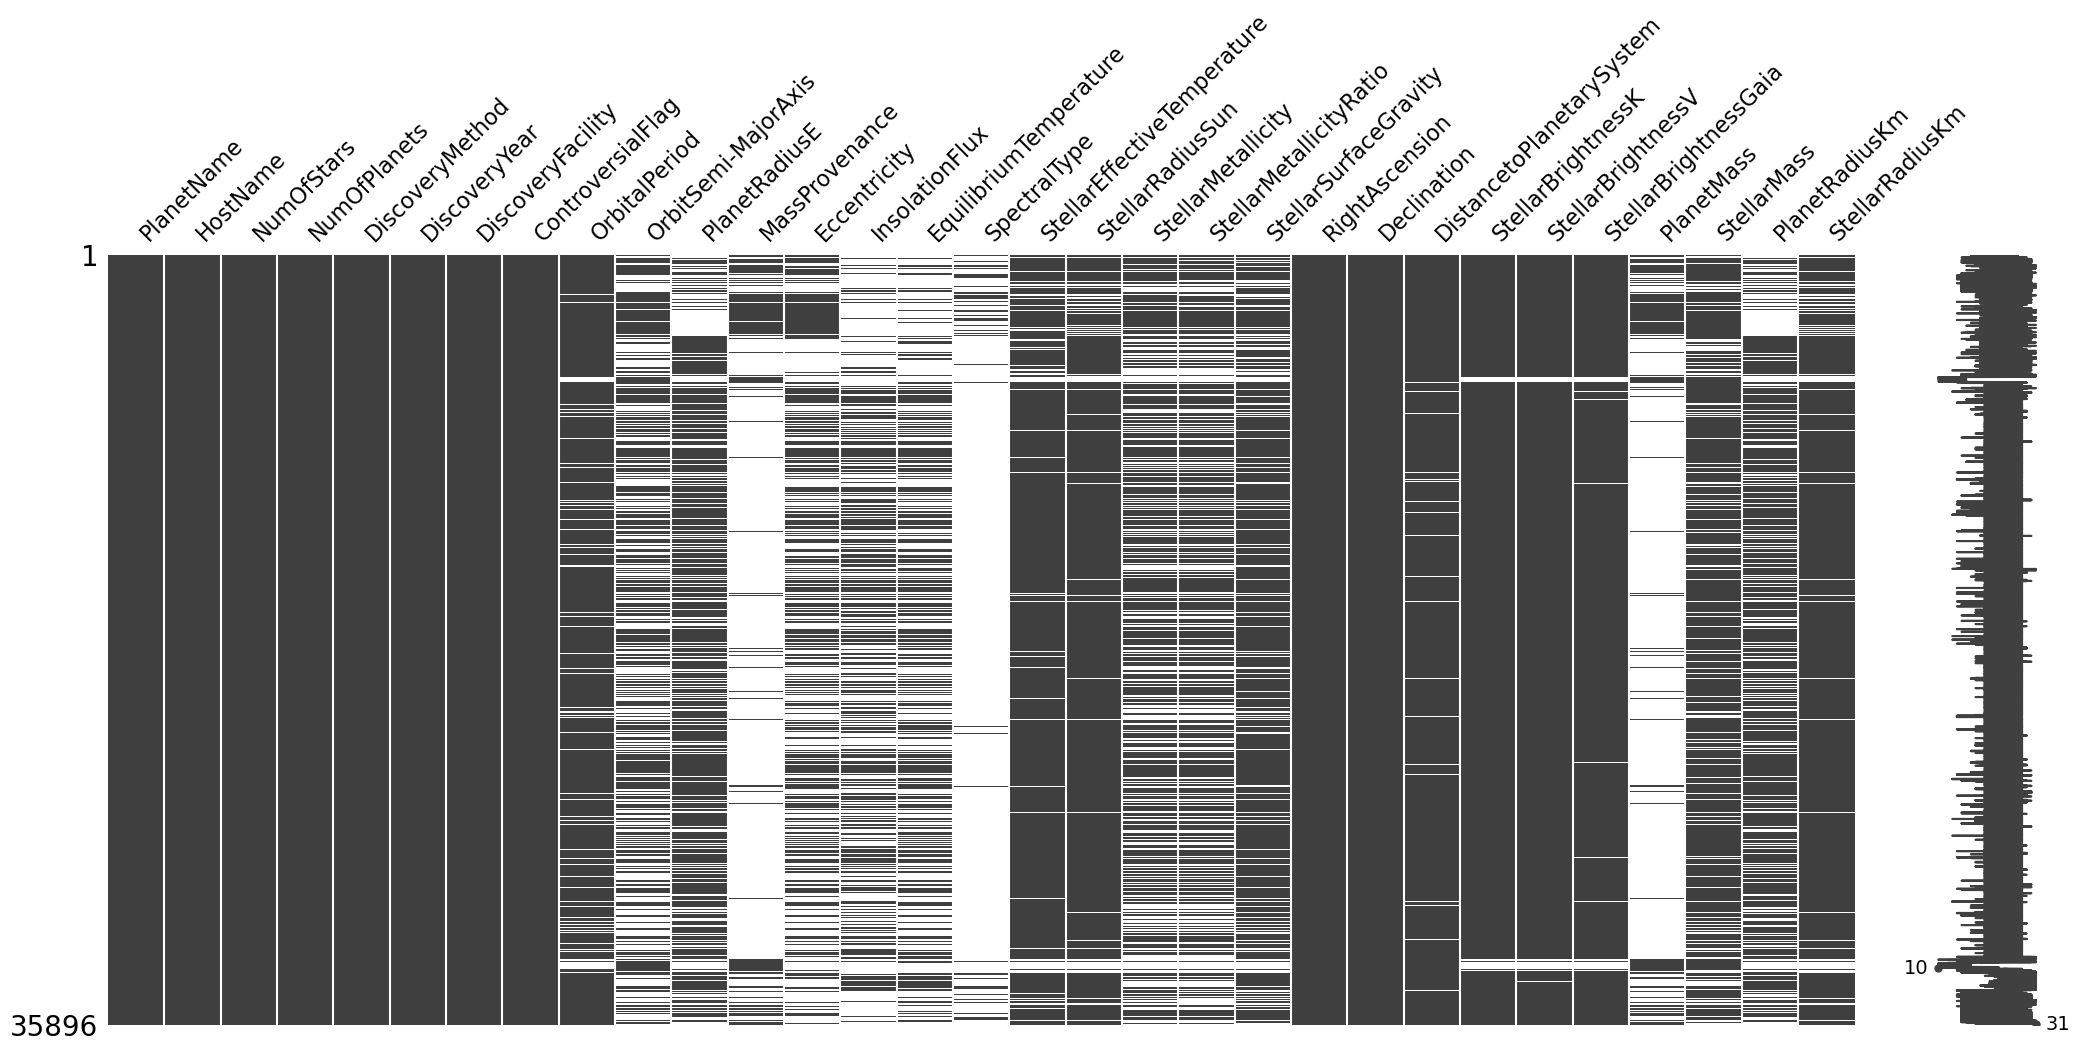

In [6]:
# Visualize missing values as a matrix 
msno.matrix(df) 

<Axes: >

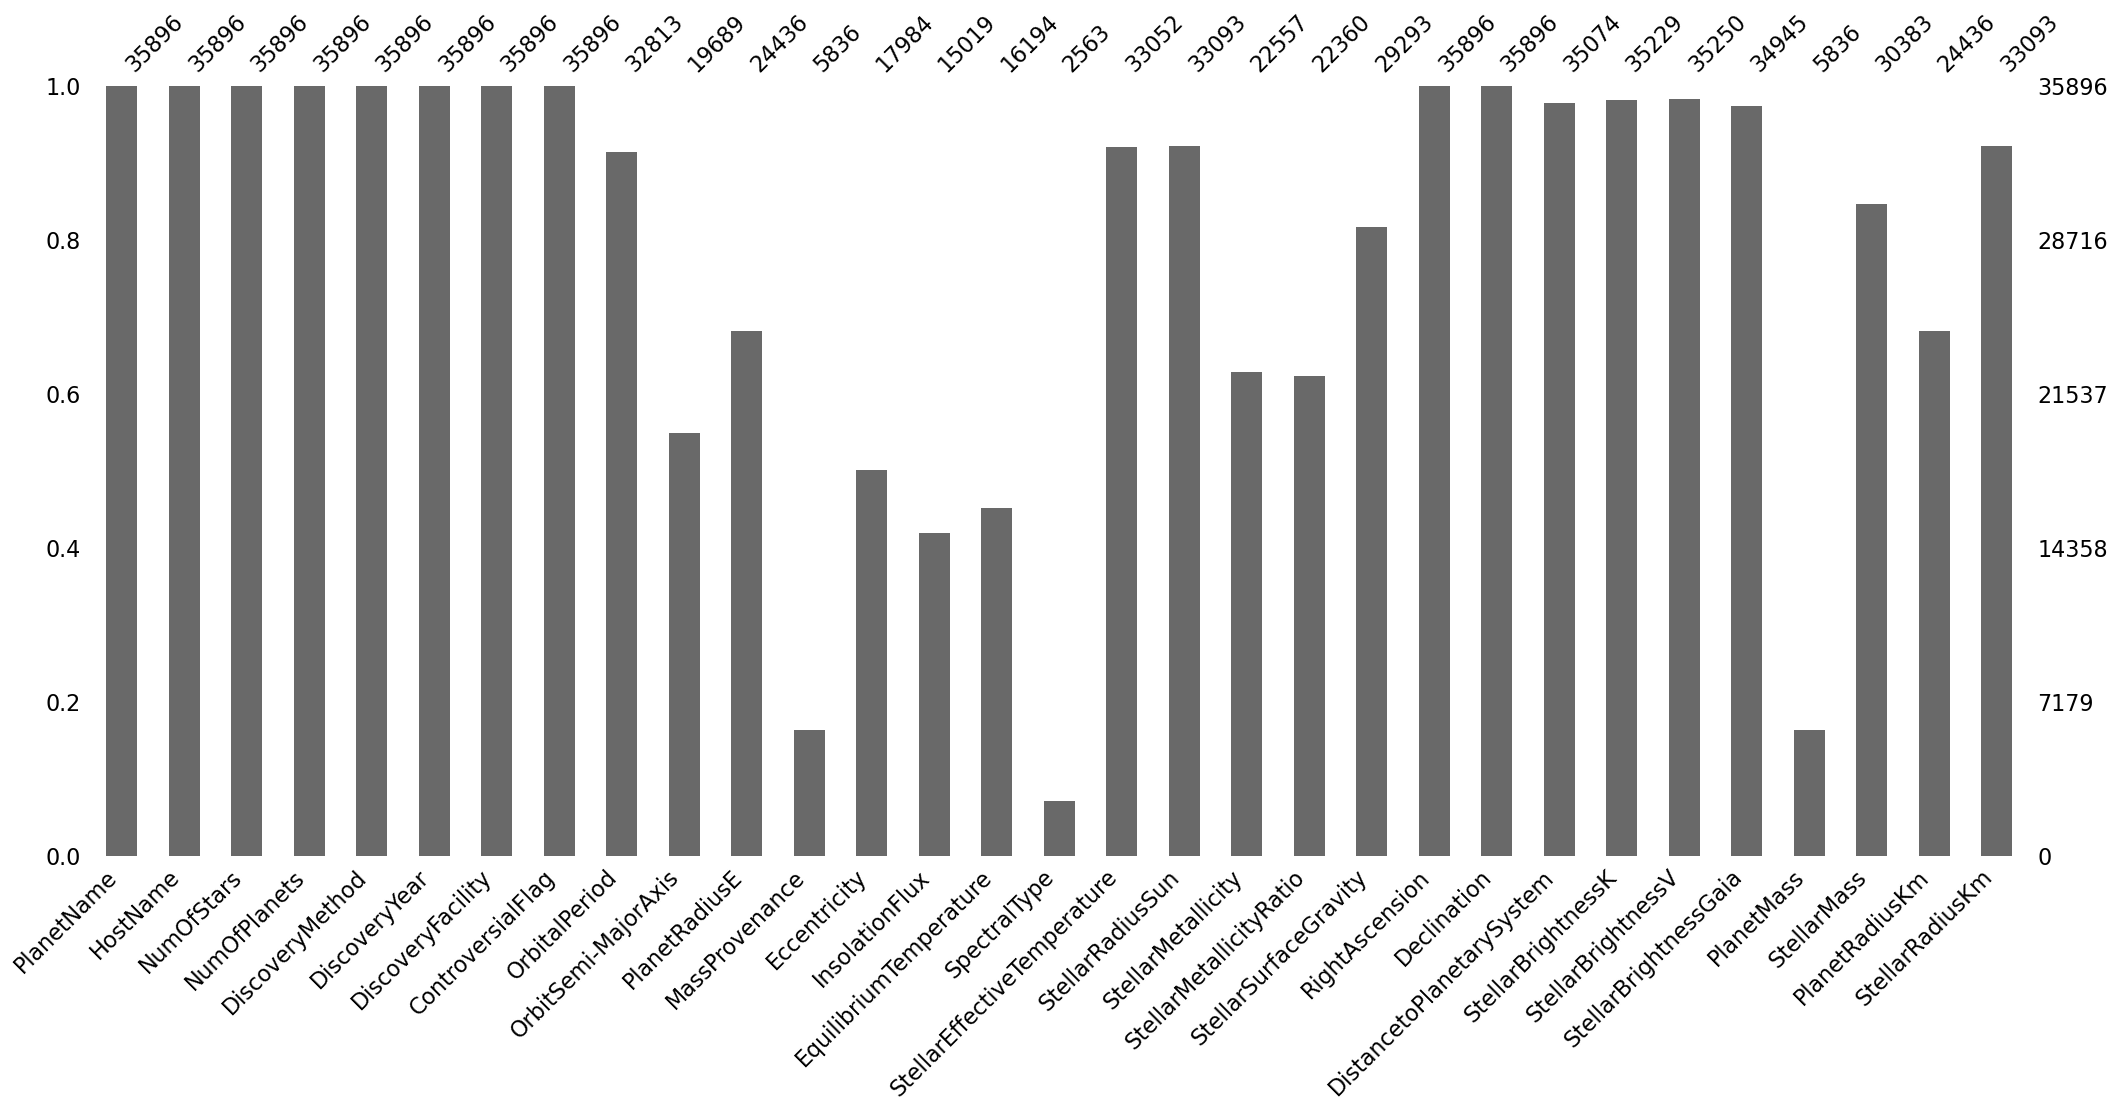

In [7]:
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df) 

<Axes: >

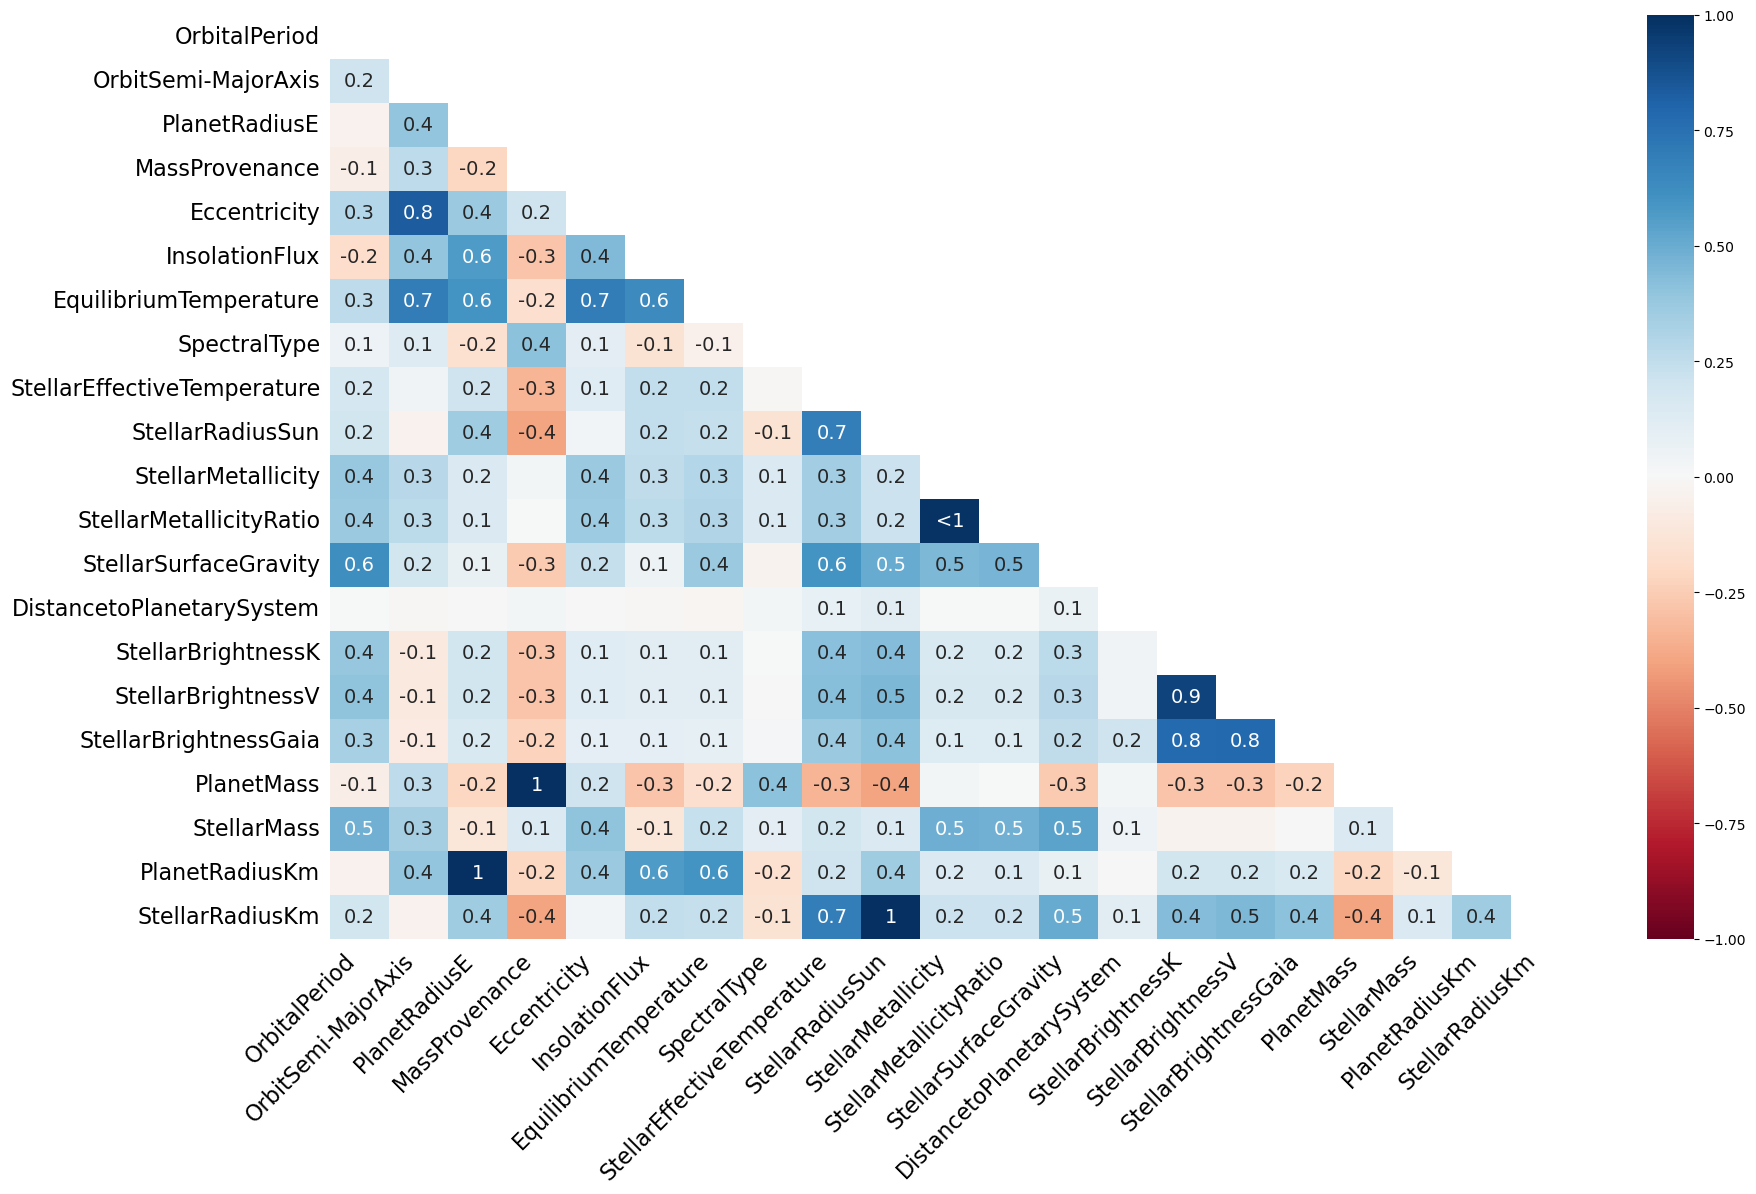

In [8]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 

#A value near -1 means if one variable appears then the other variable is very likely to be missing.
#A value near 0 means there is no dependence between the occurrence of missing values of two variables.
#A value near 1 means if one variable appears then the other variable is very likely to be present.

#Each column represents a feature or variable in the dataset.
#Each row represents an individual data point or observation in the dataset.
msno.heatmap(df)

#for example, the heatmap shows that the relationship between MassProvenance and PlanetMassE is 1, meaning that if the MassProvenance
#is present, then the PlanetMassE is very likely to be present

In [9]:
#count the number of missing values
df.isnull().sum()

PlanetName                         0
HostName                           0
NumOfStars                         0
NumOfPlanets                       0
DiscoveryMethod                    0
DiscoveryYear                      0
DiscoveryFacility                  0
ControversialFlag                  0
OrbitalPeriod                   3083
OrbitSemi-MajorAxis            16207
PlanetRadiusE                  11460
MassProvenance                 30060
Eccentricity                   17912
InsolationFlux                 20877
EquilibriumTemperature         19702
SpectralType                   33333
StellarEffectiveTemperature     2844
StellarRadiusSun                2803
StellarMetallicity             13339
StellarMetallicityRatio        13536
StellarSurfaceGravity           6603
RightAscension                     0
Declination                        0
DistancetoPlanetarySystem        822
StellarBrightnessK               667
StellarBrightnessV               646
StellarBrightnessGaia            951
P

In [10]:
#total null values
df.isnull().sum().sum()

244681

## Drop Records with Null Values

In [11]:
#Removing rows with missing values if the number of missing values is relatively small compared to the overall dataset size.
#or if they are difficult or impossible to impute 


df1 = df.dropna(subset=['OrbitalPeriod', 'StellarMass', 'StellarEffectiveTemperature','StellarRadiusKm','StellarBrightnessGaia','DistancetoPlanetarySystem','StellarSurfaceGravity','StellarBrightnessK','StellarBrightnessV','Eccentricity','StellarMetallicity', 'PlanetRadiusKm'], how='any')
print(df1.shape)
df1.isnull().sum().sum()

(11799, 31)


34121

## Drop Unnecessary Columns


(11799, 23)


PlanetName                         0
HostName                           0
NumOfStars                         0
NumOfPlanets                       0
DiscoveryMethod                    0
DiscoveryYear                      0
DiscoveryFacility                  0
ControversialFlag                  0
OrbitalPeriod                      0
OrbitSemi-MajorAxis              264
Eccentricity                       0
EquilibriumTemperature           444
StellarEffectiveTemperature        0
StellarMetallicity                 0
StellarSurfaceGravity              0
RightAscension                     0
Declination                        0
DistancetoPlanetarySystem          0
StellarBrightnessGaia              0
PlanetMass                     10635
StellarMass                        0
PlanetRadiusKm                     0
StellarRadiusKm                    0
dtype: int64

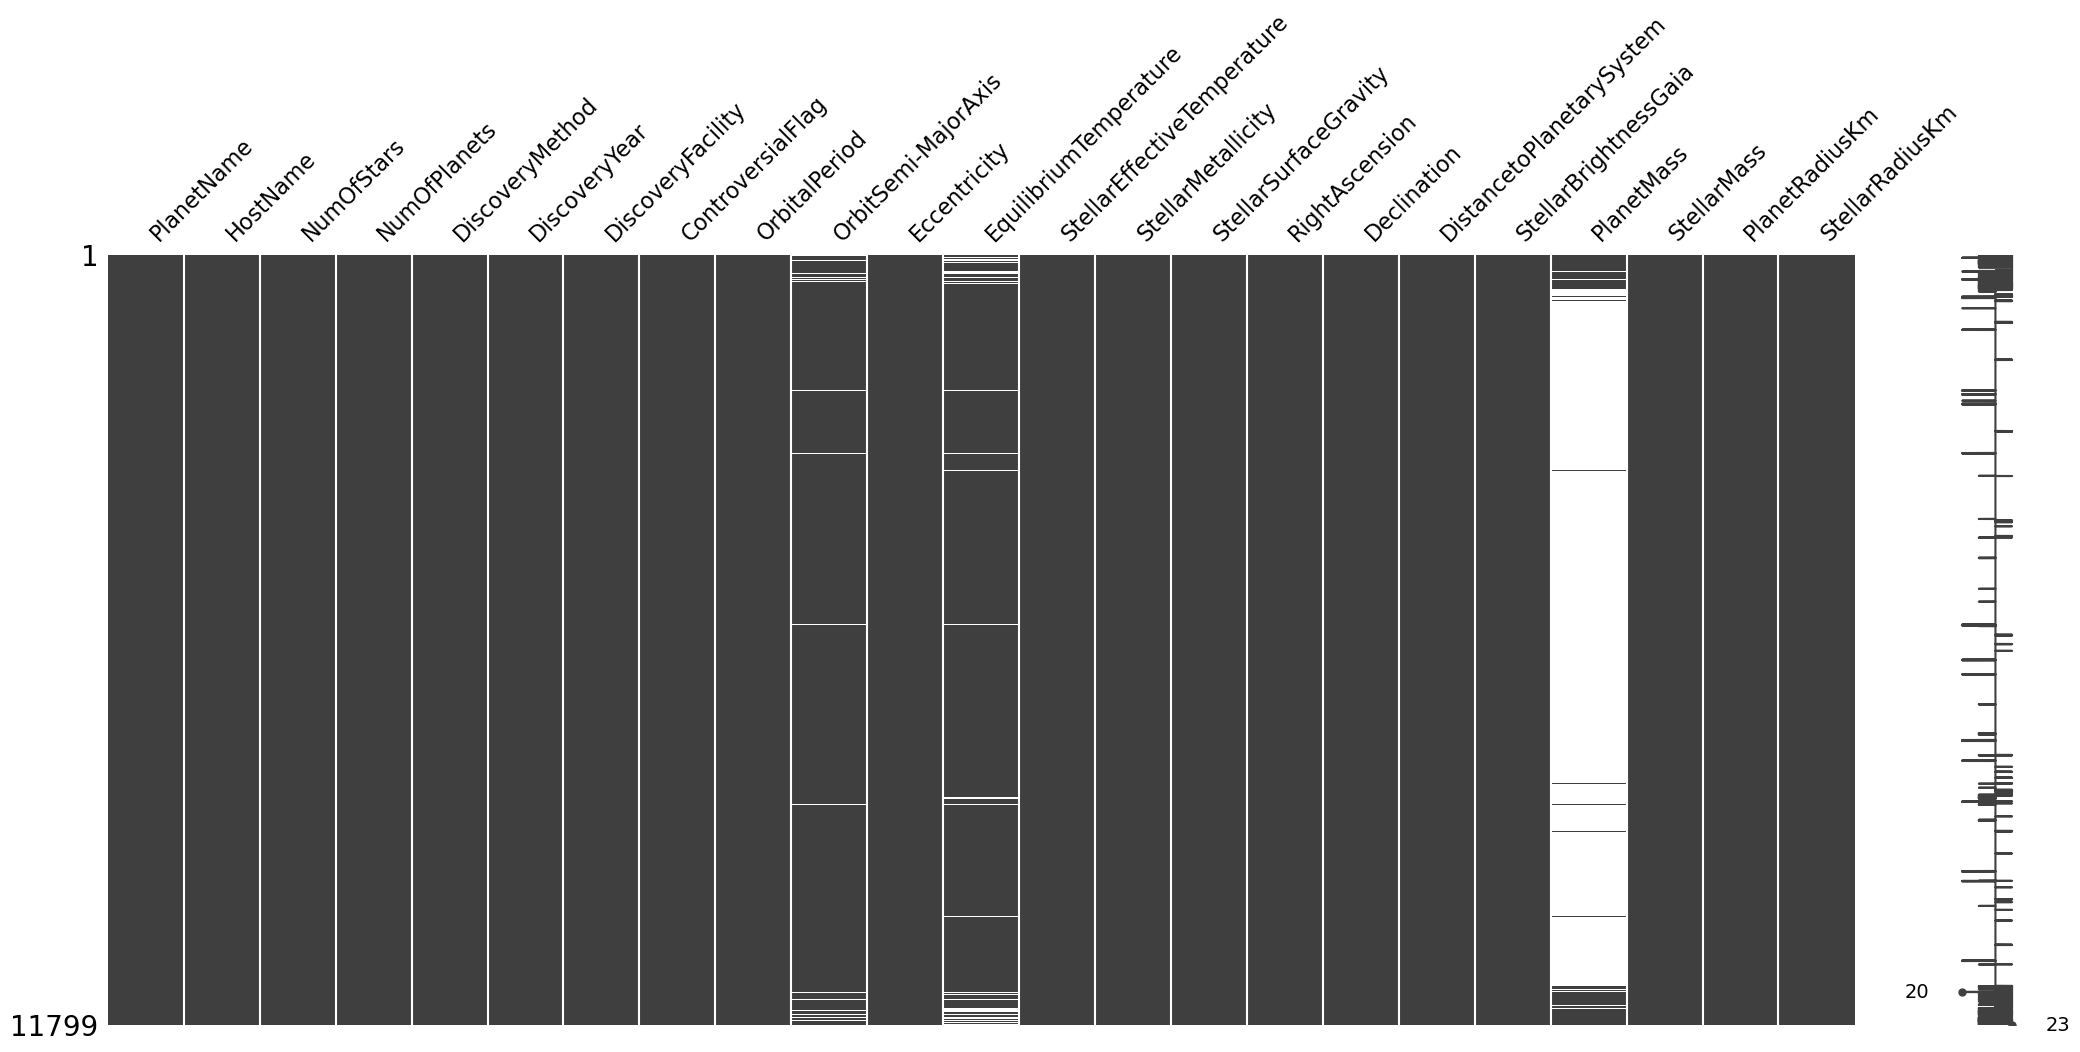

In [12]:
#drop spectral type because it has a very large number of missing values and is difficult to impute as its categorical and isnt crucial
df2 = df1.drop(['SpectralType', 'InsolationFlux', 'MassProvenance','StellarBrightnessK','StellarBrightnessV', 'StellarRadiusSun', 'PlanetRadiusE','StellarMetallicityRatio'], axis=1)
print(df2.shape)
msno.matrix(df2)
df2.isnull().sum().sum()
#count the number of missing values
df2.isnull().sum()

## Impute Missing Values

### Impute Using Calculation

<Axes: >

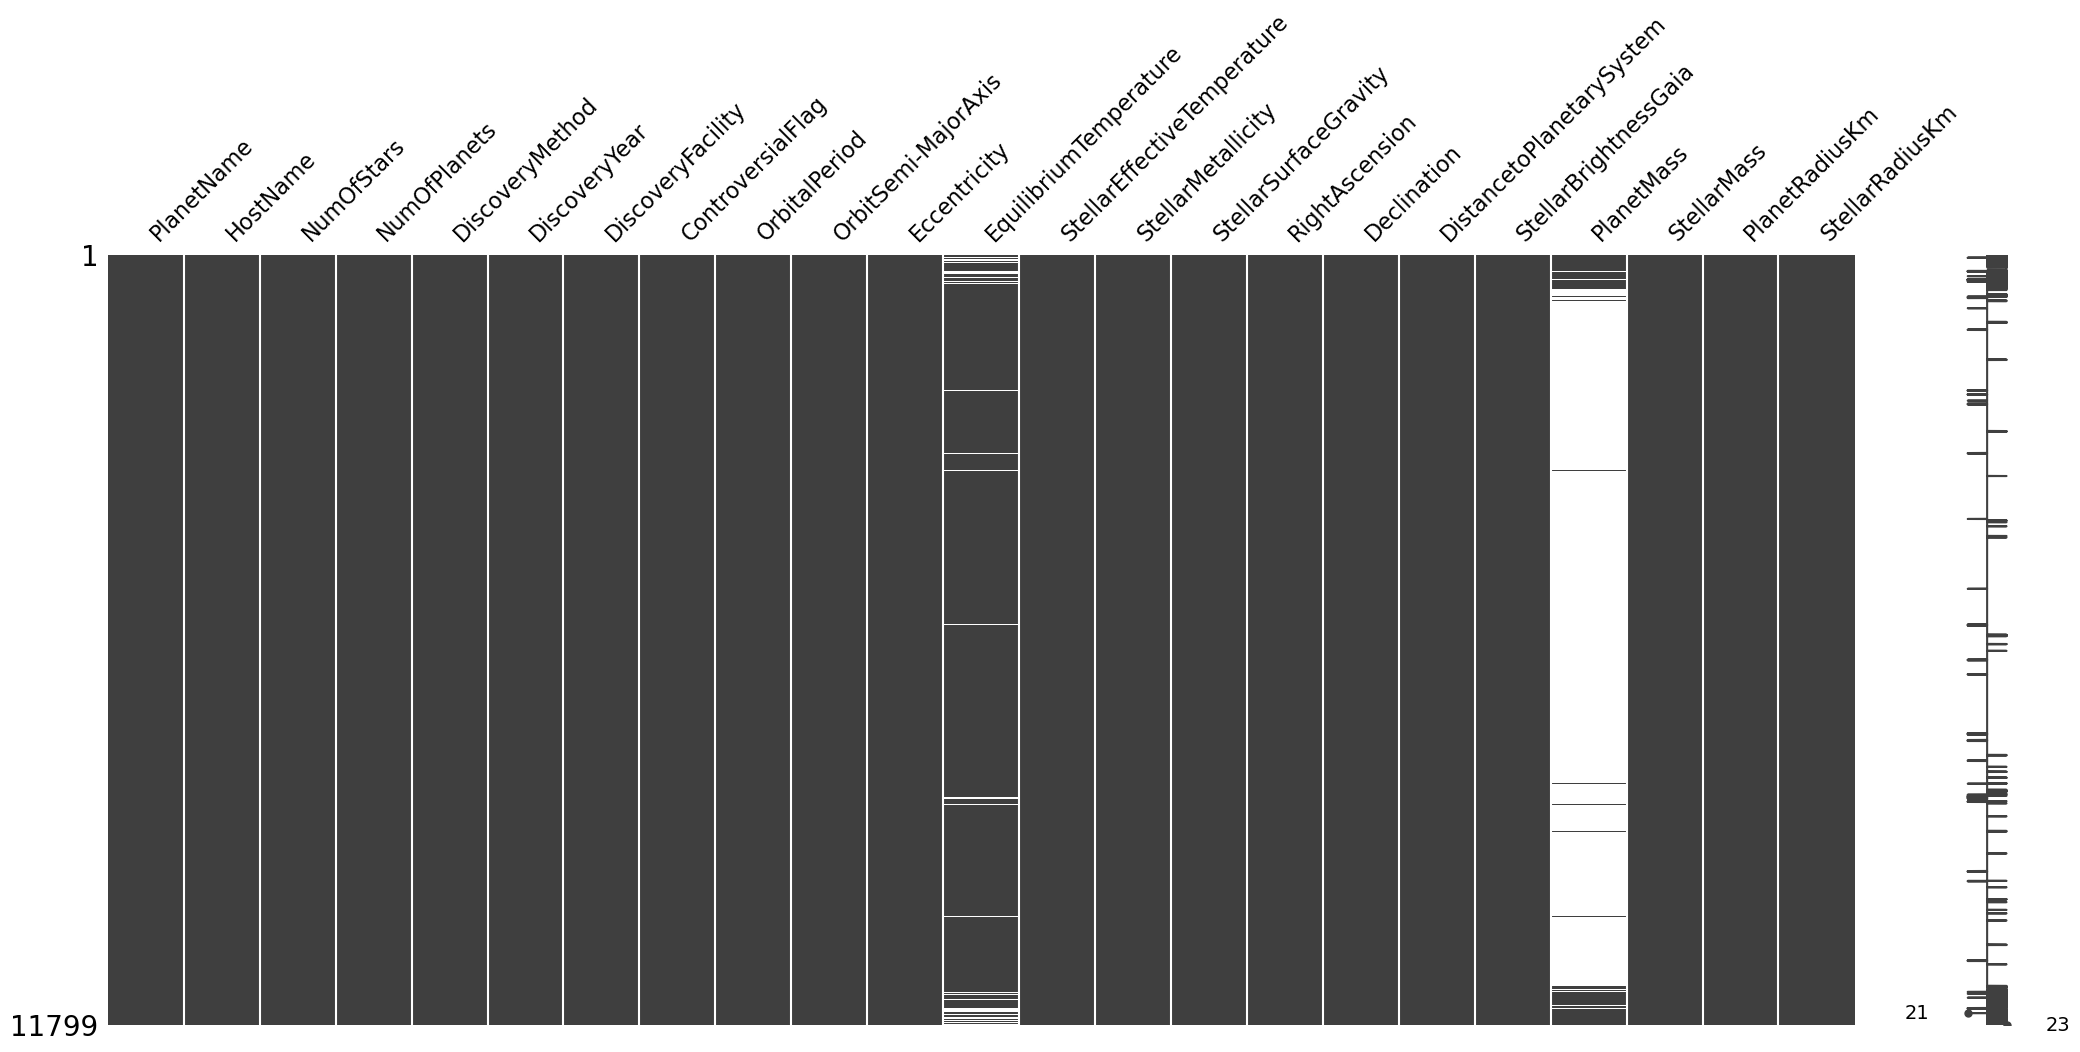

In [13]:
# Define the function to calculate the semi-major axis
def calculate_semi_major_axis(row):    
    # Gravitational constant in AU^3 / (solar mass * day^2)
    G = 2.959122082855911e-4

    # Convert star mass from solar masses to Earth masses
    star_mass_earth = row['StellarMass'] * 332946.0487

    # Convert orbital period from days to seconds
    period_seconds = row['OrbitalPeriod'] * 86400


    
    # Approximate the semi-major axis assuming the planet mass is negligible
    semi_major_axis = ((G * star_mass_earth * period_seconds**2) / (4 * np.pi**2))**(1/3)
   
    # Convert semi-major axis from AU to Earth radii
    semi_major_axis_earth_radii = semi_major_axis * 23454.7
    
    return semi_major_axis_earth_radii
    
df2['OrbitSemi-MajorAxis'] = df2.apply(lambda row: calculate_semi_major_axis(row) if np.isnan(row['OrbitSemi-MajorAxis']) else row['OrbitSemi-MajorAxis'], axis=1)
msno.matrix(df2)


pd.set_option('display.max_columns', None) #to show all columns
pd.set_option('display.max_rows', None) #to show all columns
df2.head(100)

<Axes: >

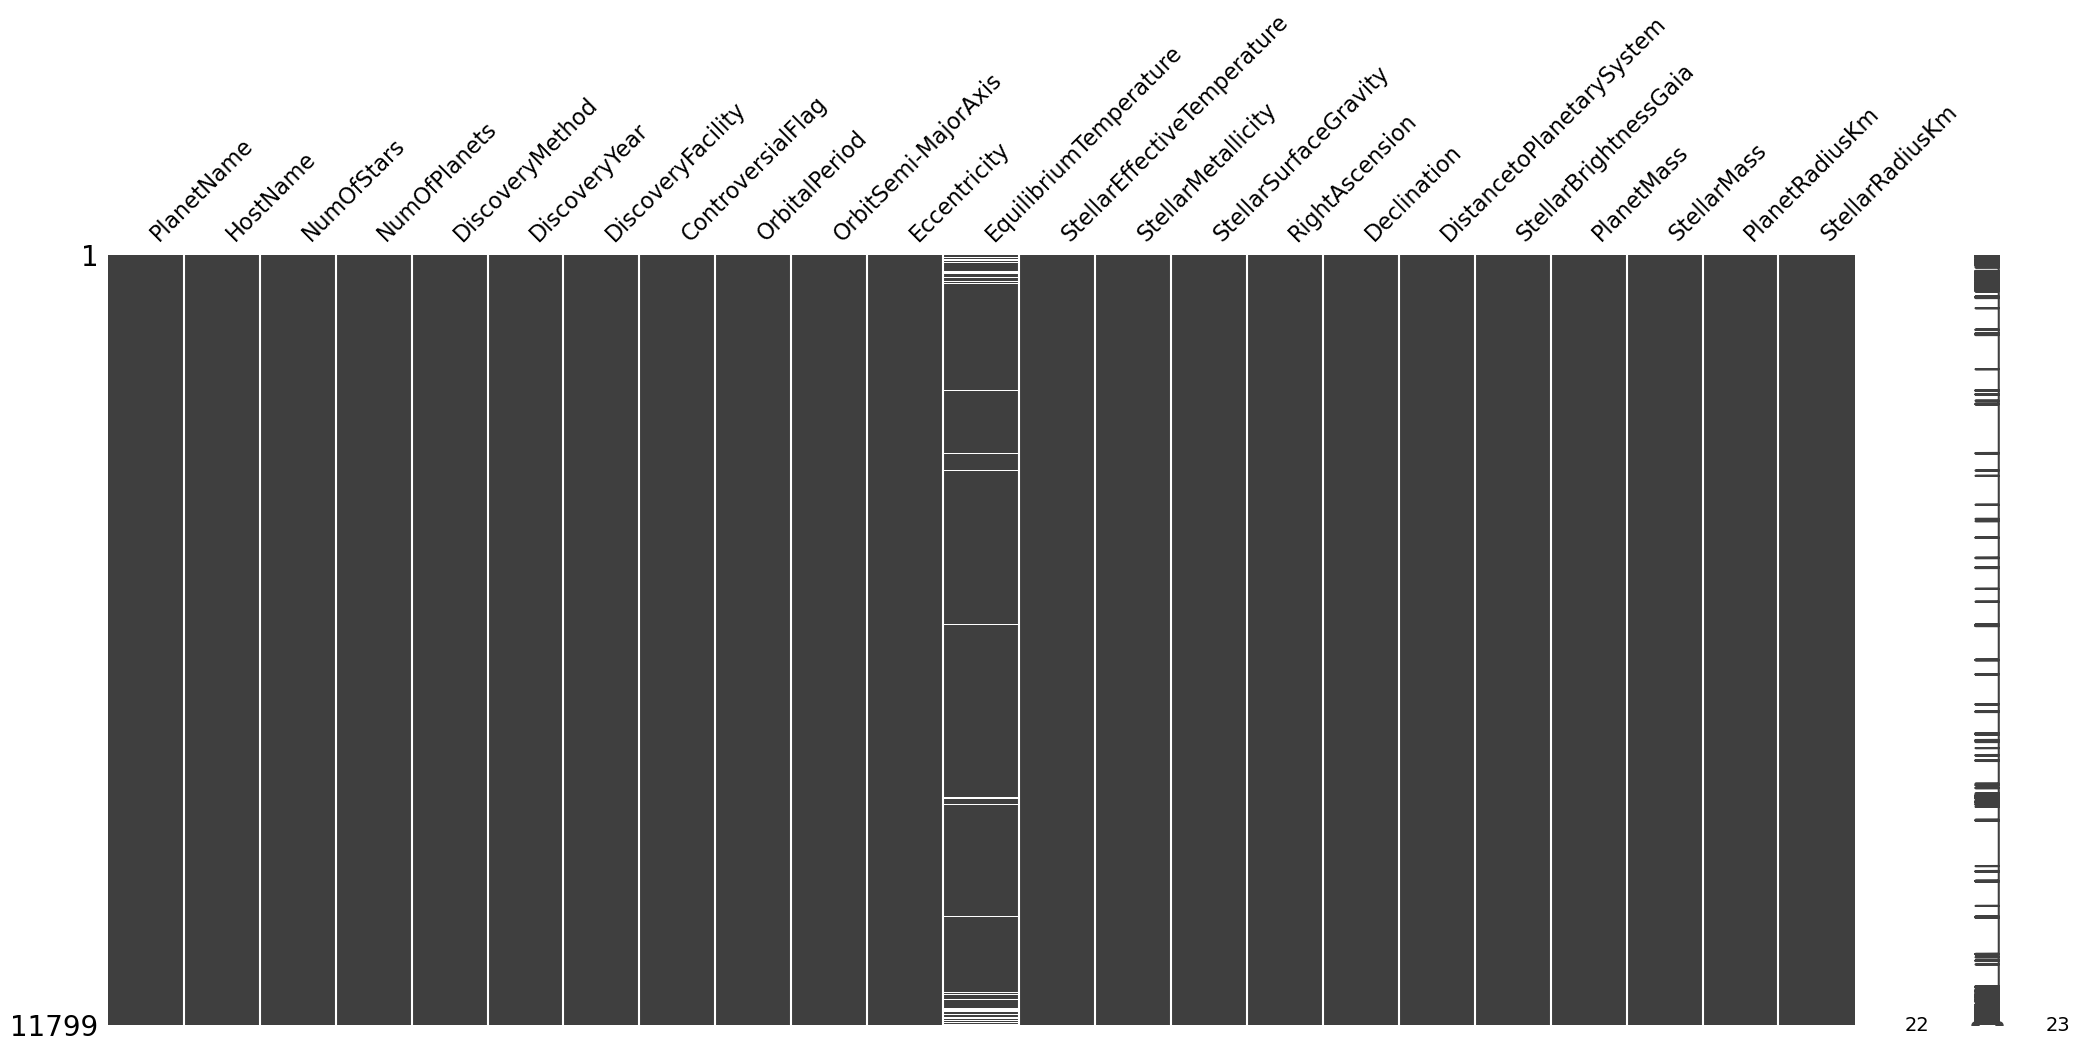

In [14]:
def calculate_planet_mass(r, T):
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
    pi = math.pi

    mass = (4 * pi**2 * r**3) / (G * T**2)
    return mass

def impute_planet_mass(row):
    if pd.isnull(row['PlanetMass']):
        orbital_radius = row['OrbitSemi-MajorAxis'] * 1.496e11  # Convert AU to meters
        orbital_period = row['OrbitalPeriod'] * 86400  # Convert days to seconds
        planet_mass = calculate_planet_mass(orbital_radius, orbital_period)
        return planet_mass
    else:
        return row['PlanetMass']

# Assuming your DataFrame is named 'df'
df2['PlanetMass'] = df2.apply(impute_planet_mass, axis=1)
msno.matrix(df2)

### Impute Using Linear Regression 

In [15]:
# Select the relevant columns for imputing planet equilibrium temperature
X = df2[['StellarMass', 'StellarRadiusKm', 'StellarEffectiveTemperature', 'OrbitSemi-MajorAxis', 'Eccentricity']]
y = df2['EquilibriumTemperature']

# Create a mask for missing values in the target column
mask = np.isnan(y)

# Impute missing values in the predictor columns using the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Fit a linear regression model on the non-missing data
model = LinearRegression()
model.fit(X[~mask], y[~mask])

# Use the model to predict the missing values
y_imputed = model.predict(X[mask])

# Assign the imputed values to the original DataFrame
df2.loc[mask, 'EquilibriumTemperature'] = y_imputed

0

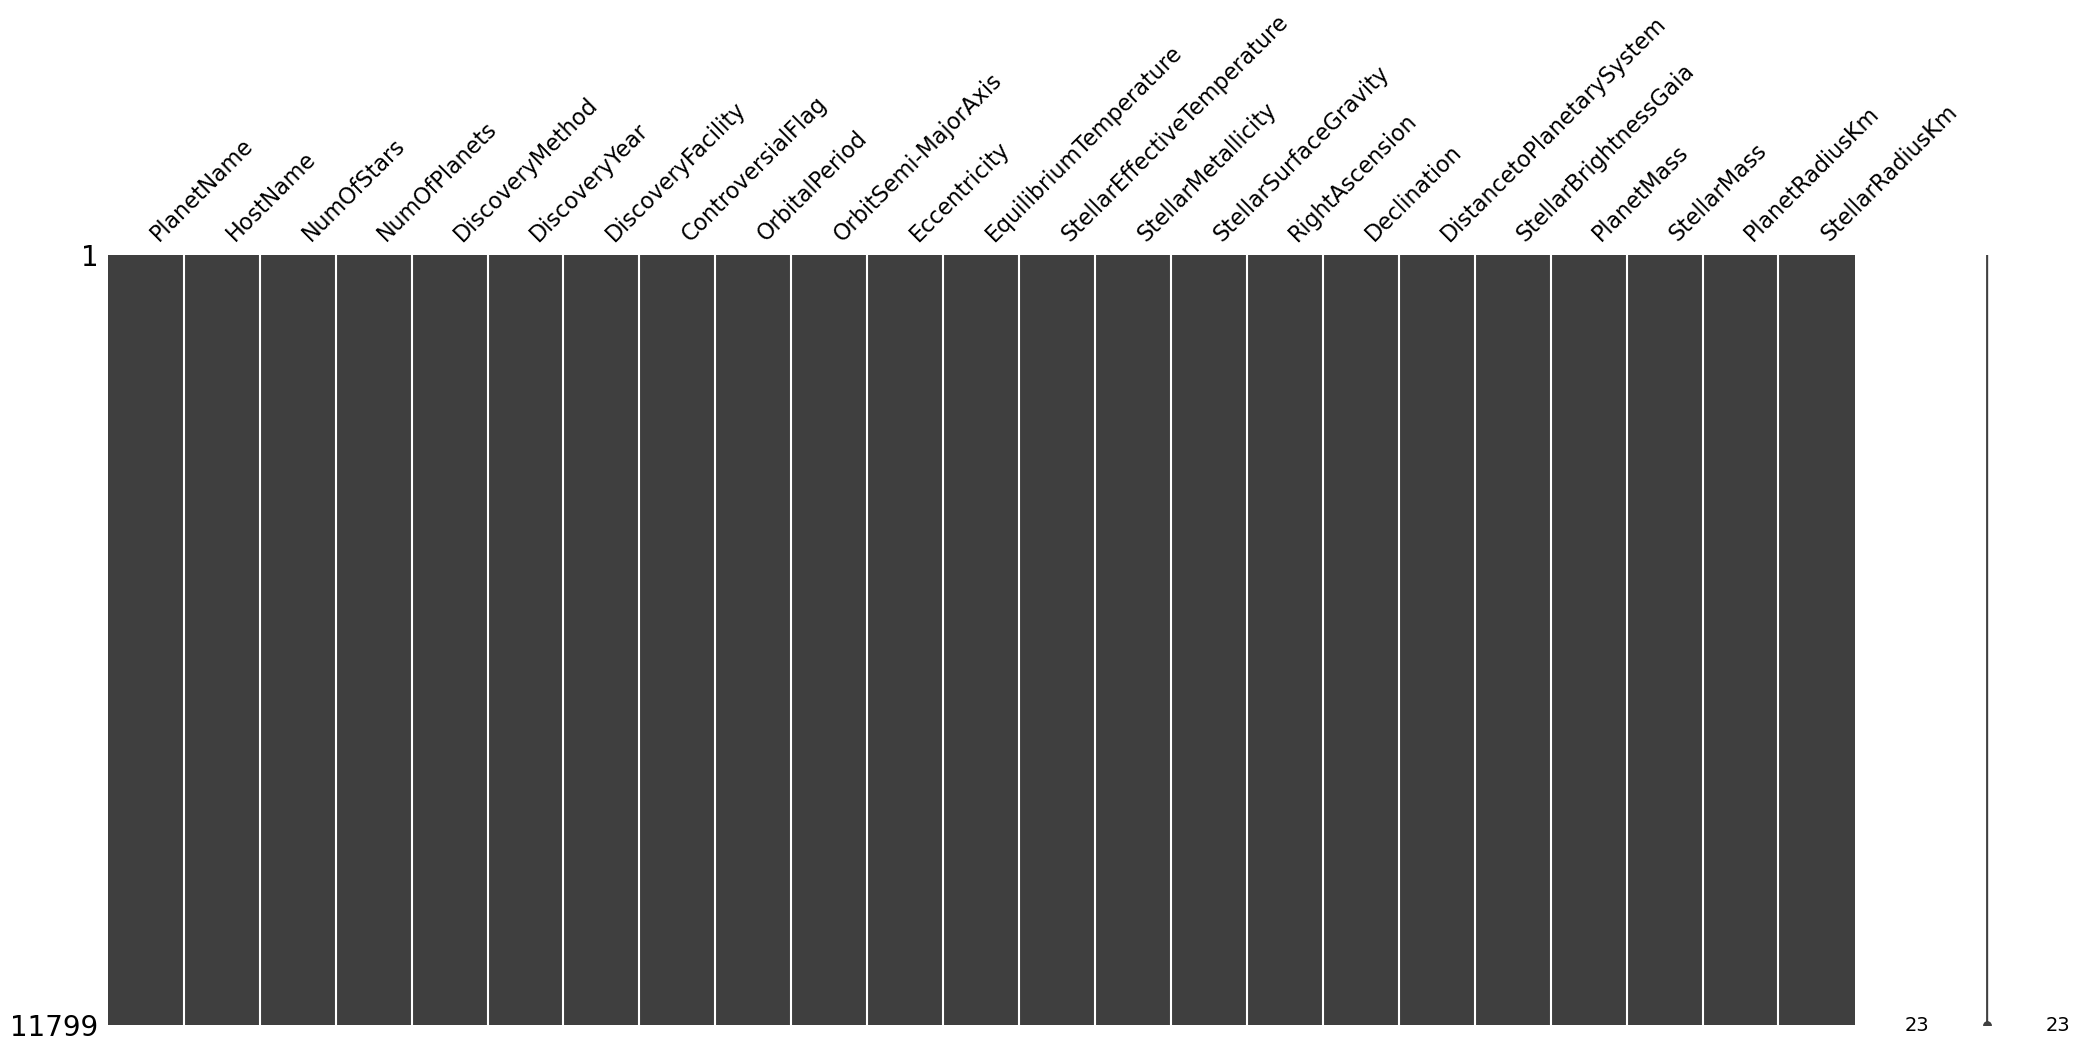

In [16]:
msno.matrix(df2)
df2.isnull().sum().sum()

## Handling Redundancies

In [17]:
# Remove duplicate rows based on specific columns

# Remove duplicate rows based on all specified features
df_unique = df2.drop_duplicates(subset=["PlanetName", "HostName", "NumOfStars", "NumOfPlanets",
                                       "DiscoveryMethod", "DiscoveryYear", "DiscoveryFacility",
                                       "ControversialFlag", "OrbitalPeriod", "OrbitSemi-MajorAxis",
                                       "PlanetRadiusKm", "Eccentricity", "EquilibriumTemperature",
                                       "StellarEffectiveTemperature", "StellarRadiusKm",
                                       "StellarMetallicity",
                                       "StellarSurfaceGravity", "RightAscension", "Declination",
                                       "DistancetoPlanetarySystem", "StellarBrightnessGaia",
                                       "PlanetMass", "StellarMass"])

# Print the updated DataFrame
df_unique.head()

print(df_unique.shape)

(6602, 23)


## Different Spellings/Typos

In [18]:
unique_values = df_unique['DiscoveryMethod'].unique().tolist()
df_unique.loc[:, "BestMatch"] = df_unique["DiscoveryMethod"].map(lambda x: process.extract(x, unique_values, limit=1)[0][0])
#df_unique["BestMatch"] = df_unique["DiscoveryMethod"].map(lambda x: process.extract(x, unique_values, limit=1)[0][0])

C:\Users\USER\AppData\Local\Temp\ipykernel_8624\2110253768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[:, "BestMatch"] = df_unique["DiscoveryMethod"].map(lambda x: process.extract(x, unique_values, limit=1)[0][0])


In [19]:
#compare the BestMatch and Dicovery Method columns, and if they are not the same, replace the Discovery Method with the BestMatch found
df_unique.loc[df_unique["DiscoveryMethod"] != df_unique["BestMatch"], "DiscoveryMethod"] = df_unique["BestMatch"] 
df_unique = df_unique.drop("BestMatch", axis=1)#drop the column after calculations
#df_unique.head(10)

## Calculating Some Neccessary Columns

In [20]:

df_unique["PlanetGravity"] = 6.67430e-11 * df_unique['PlanetMass'] / (df_unique['PlanetRadiusKm'] ** 2)
df_unique.head(10)

,PlanetName,HostName,NumOfStars,NumOfPlanets,DiscoveryMethod,DiscoveryYear,DiscoveryFacility,ControversialFlag,OrbitalPeriod,OrbitSemi-MajorAxis,Eccentricity,EquilibriumTemperature,StellarEffectiveTemperature,StellarMetallicity,StellarSurfaceGravity,RightAscension,Declination,DistancetoPlanetarySystem,StellarBrightnessGaia,PlanetMass,StellarMass,PlanetRadiusKm,StellarRadiusKm,PlanetGravity
102,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736547,1.544000e-02,0.05000,836.388727,5172.0,0.35,4.43,133.146837,28.329815,12.5855,5.72973,4.771948e+25,1.809535e+30,11945.625,653958.0,2.231946e+07
110,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736546,1.583000e-02,0.00000,828.305948,5250.0,0.35,4.42,133.146837,28.329815,12.5855,5.72973,4.998899e+25,1.789650e+30,13844.183,667872.0,1.740786e+07
112,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736544,1.544000e-02,0.06100,1958.000000,5234.0,0.31,4.45,133.146837,28.329815,12.5855,5.72973,4.664444e+25,1.809535e+30,13251.680,653958.0,1.772816e+07
163,AU Mic b,AU Mic,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,8.463080,6.490000e-02,0.00577,600.000000,3678.0,0.23,4.40,311.291137,-31.342450,9.7221,7.84038,1.012508e+30,1.014135e+30,25210.047,514818.0,1.063303e+11
169,AU Mic c,AU Mic,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),0,18.859690,1.108000e-01,0.00338,459.000000,3678.0,0.23,4.40,311.291137,-31.342450,9.7221,7.84038,1.014545e+30,1.014135e+30,16067.662,514818.0,2.622840e+11
185,BD+20 594 b,BD+20 594,1,1,Transit,2016,K2,0,41.685500,2.410000e-01,0.00000,546.000000,5766.0,-0.15,4.50,53.651123,20.599021,179.4610,10.86440,9.735012e+25,1.908960e+30,14207.330,647001.0,3.218973e+07
186,BD+20 594 b,BD+20 594,1,1,Transit,2016,K2,0,41.685500,1.115241e+19,0.00000,1499.151026,5766.0,-0.15,4.50,53.651123,20.599021,179.4610,10.86440,1.328746e+26,3.320795e+30,16424.438,751356.0,3.287506e+07
228,CoRoT-1 b,CoRoT-1,1,1,Transit,2008,CoRoT,0,1.508956,1.011188e+18,0.00000,1898.000000,5950.0,-0.30,4.25,102.079859,-3.102139,787.9090,13.45700,1.955065e+27,1.889075e+30,106395.700,772227.0,1.152707e+07
230,CoRoT-10 b,CoRoT-10,1,1,Transit,2010,CoRoT,0,13.240600,1.055000e-01,0.53000,600.000000,5075.0,0.26,4.65,291.063681,0.746014,338.3860,14.66450,5.219878e+27,1.769765e+30,69252.770,549603.0,7.264266e+07
236,CoRoT-11 b,CoRoT-11,1,1,Transit,2010,CoRoT,0,2.994330,4.360000e-02,0.00000,1657.000000,6440.0,-0.03,4.22,280.687300,5.937659,655.0370,12.84100,4.422622e+27,2.525395e+30,102127.130,953109.0,2.830110e+07


In [21]:
df_unique['StellarVolume'] = 4.0/3.0 * pi * (df_unique['StellarRadiusKm']**3)
df_unique.head(10)

,PlanetName,HostName,NumOfStars,NumOfPlanets,DiscoveryMethod,DiscoveryYear,DiscoveryFacility,ControversialFlag,OrbitalPeriod,OrbitSemi-MajorAxis,Eccentricity,EquilibriumTemperature,StellarEffectiveTemperature,StellarMetallicity,StellarSurfaceGravity,RightAscension,Declination,DistancetoPlanetarySystem,StellarBrightnessGaia,PlanetMass,StellarMass,PlanetRadiusKm,StellarRadiusKm,PlanetGravity,StellarVolume
102,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736547,1.544000e-02,0.05000,836.388727,5172.0,0.35,4.43,133.146837,28.329815,12.5855,5.72973,4.771948e+25,1.809535e+30,11945.625,653958.0,2.231946e+07,1.171489e+18
110,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736546,1.583000e-02,0.00000,828.305948,5250.0,0.35,4.42,133.146837,28.329815,12.5855,5.72973,4.998899e+25,1.789650e+30,13844.183,667872.0,1.740786e+07,1.247867e+18
112,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736544,1.544000e-02,0.06100,1958.000000,5234.0,0.31,4.45,133.146837,28.329815,12.5855,5.72973,4.664444e+25,1.809535e+30,13251.680,653958.0,1.772816e+07,1.171489e+18
163,AU Mic b,AU Mic,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,8.463080,6.490000e-02,0.00577,600.000000,3678.0,0.23,4.40,311.291137,-31.342450,9.7221,7.84038,1.012508e+30,1.014135e+30,25210.047,514818.0,1.063303e+11,5.715441e+17
169,AU Mic c,AU Mic,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),0,18.859690,1.108000e-01,0.00338,459.000000,3678.0,0.23,4.40,311.291137,-31.342450,9.7221,7.84038,1.014545e+30,1.014135e+30,16067.662,514818.0,2.622840e+11,5.715441e+17
185,BD+20 594 b,BD+20 594,1,1,Transit,2016,K2,0,41.685500,2.410000e-01,0.00000,546.000000,5766.0,-0.15,4.50,53.651123,20.599021,179.4610,10.86440,9.735012e+25,1.908960e+30,14207.330,647001.0,3.218973e+07,1.134497e+18
186,BD+20 594 b,BD+20 594,1,1,Transit,2016,K2,0,41.685500,1.115241e+19,0.00000,1499.151026,5766.0,-0.15,4.50,53.651123,20.599021,179.4610,10.86440,1.328746e+26,3.320795e+30,16424.438,751356.0,3.287506e+07,1.776748e+18
228,CoRoT-1 b,CoRoT-1,1,1,Transit,2008,CoRoT,0,1.508956,1.011188e+18,0.00000,1898.000000,5950.0,-0.30,4.25,102.079859,-3.102139,787.9090,13.45700,1.955065e+27,1.889075e+30,106395.700,772227.0,1.152707e+07,1.928961e+18
230,CoRoT-10 b,CoRoT-10,1,1,Transit,2010,CoRoT,0,13.240600,1.055000e-01,0.53000,600.000000,5075.0,0.26,4.65,291.063681,0.746014,338.3860,14.66450,5.219878e+27,1.769765e+30,69252.770,549603.0,7.264266e+07,6.954019e+17
236,CoRoT-11 b,CoRoT-11,1,1,Transit,2010,CoRoT,0,2.994330,4.360000e-02,0.00000,1657.000000,6440.0,-0.03,4.22,280.687300,5.937659,655.0370,12.84100,4.422622e+27,2.525395e+30,102127.130,953109.0,2.830110e+07,3.626739e+18


In [22]:
df_unique['StellarDensity'] = df_unique["StellarMass"] / df_unique["StellarVolume"]
df_unique.head(10)

,PlanetName,HostName,NumOfStars,NumOfPlanets,DiscoveryMethod,DiscoveryYear,DiscoveryFacility,ControversialFlag,OrbitalPeriod,OrbitSemi-MajorAxis,Eccentricity,EquilibriumTemperature,StellarEffectiveTemperature,StellarMetallicity,StellarSurfaceGravity,RightAscension,Declination,DistancetoPlanetarySystem,StellarBrightnessGaia,PlanetMass,StellarMass,PlanetRadiusKm,StellarRadiusKm,PlanetGravity,StellarVolume,StellarDensity
102,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736547,1.544000e-02,0.05000,836.388727,5172.0,0.35,4.43,133.146837,28.329815,12.5855,5.72973,4.771948e+25,1.809535e+30,11945.625,653958.0,2.231946e+07,1.171489e+18,1.544645e+12
110,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736546,1.583000e-02,0.00000,828.305948,5250.0,0.35,4.42,133.146837,28.329815,12.5855,5.72973,4.998899e+25,1.789650e+30,13844.183,667872.0,1.740786e+07,1.247867e+18,1.434167e+12
112,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736544,1.544000e-02,0.06100,1958.000000,5234.0,0.31,4.45,133.146837,28.329815,12.5855,5.72973,4.664444e+25,1.809535e+30,13251.680,653958.0,1.772816e+07,1.171489e+18,1.544645e+12
163,AU Mic b,AU Mic,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,8.463080,6.490000e-02,0.00577,600.000000,3678.0,0.23,4.40,311.291137,-31.342450,9.7221,7.84038,1.012508e+30,1.014135e+30,25210.047,514818.0,1.063303e+11,5.715441e+17,1.774377e+12
169,AU Mic c,AU Mic,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),0,18.859690,1.108000e-01,0.00338,459.000000,3678.0,0.23,4.40,311.291137,-31.342450,9.7221,7.84038,1.014545e+30,1.014135e+30,16067.662,514818.0,2.622840e+11,5.715441e+17,1.774377e+12
185,BD+20 594 b,BD+20 594,1,1,Transit,2016,K2,0,41.685500,2.410000e-01,0.00000,546.000000,5766.0,-0.15,4.50,53.651123,20.599021,179.4610,10.86440,9.735012e+25,1.908960e+30,14207.330,647001.0,3.218973e+07,1.134497e+18,1.682648e+12
186,BD+20 594 b,BD+20 594,1,1,Transit,2016,K2,0,41.685500,1.115241e+19,0.00000,1499.151026,5766.0,-0.15,4.50,53.651123,20.599021,179.4610,10.86440,1.328746e+26,3.320795e+30,16424.438,751356.0,3.287506e+07,1.776748e+18,1.869030e+12
228,CoRoT-1 b,CoRoT-1,1,1,Transit,2008,CoRoT,0,1.508956,1.011188e+18,0.00000,1898.000000,5950.0,-0.30,4.25,102.079859,-3.102139,787.9090,13.45700,1.955065e+27,1.889075e+30,106395.700,772227.0,1.152707e+07,1.928961e+18,9.793223e+11
230,CoRoT-10 b,CoRoT-10,1,1,Transit,2010,CoRoT,0,13.240600,1.055000e-01,0.53000,600.000000,5075.0,0.26,4.65,291.063681,0.746014,338.3860,14.66450,5.219878e+27,1.769765e+30,69252.770,549603.0,7.264266e+07,6.954019e+17,2.544953e+12
236,CoRoT-11 b,CoRoT-11,1,1,Transit,2010,CoRoT,0,2.994330,4.360000e-02,0.00000,1657.000000,6440.0,-0.03,4.22,280.687300,5.937659,655.0370,12.84100,4.422622e+27,2.525395e+30,102127.130,953109.0,2.830110e+07,3.626739e+18,6.963266e+11


## Outliers

Q1:  155570101852.70483
Q3:  1144862472913.5671
IQR:  989292371060.8623


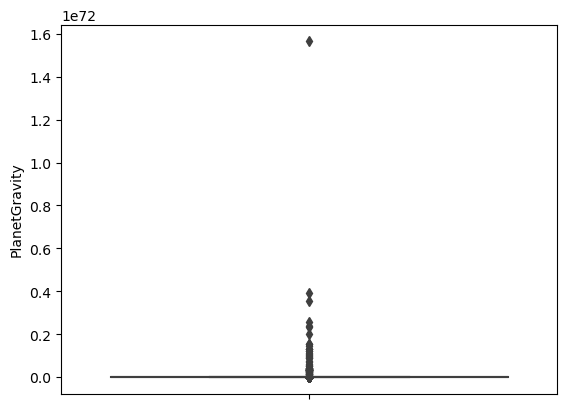

In [23]:
#calculating upper and lower bounds and quartile ranges for Planet Gravity
Q1 = df_unique['PlanetGravity'].quantile(0.25)
print('Q1: ', Q1)
Q3 = df_unique['PlanetGravity'].quantile(0.75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)

lower_bound = Q1 - 1.5 * IQR

#print this if you need more info
#print('lower_bound: ', lower_bound)
upper_bound = Q3 + 1.5 * IQR
#print this if you need more info
#print('upper_bound: ', upper_bound)

filter_lower_bound = (df_unique['PlanetGravity'] < lower_bound)
filter_upper_bound = (df_unique['PlanetGravity'] > upper_bound)
# to see outliers values:
#print(df_unique['PlanetGravity'][(filter_lower_bound | filter_upper_bound)])

df_filtered = df_unique[~(filter_lower_bound | filter_upper_bound)]

# IQR 
Q1 = np.percentile(df_unique['PlanetGravity'], 25, 
                method = 'midpoint') 
  
Q3 = np.percentile(df_unique['PlanetGravity'], 75, 
                method = 'midpoint') 
IQR = Q3 - Q1 

#print this if you need more info 
#print("Old Shape: ", df_unique.shape) 
  
# Upper bound 
upper = np.where(df_unique['PlanetGravity'] >= (Q3+1.5*IQR)) 
  
# Lower bound 
lower = np.where(df_unique['PlanetGravity']<= (Q1-1.5*IQR)) 
#print this if you need more info
#print(upper, lower,lower[0],upper[0],IQR)

sns.boxplot(data = df_unique, y = 'PlanetGravity');

plt.show()


Due to the domain logic, the planet gravity "outliers" should not be removed since the very high gravity is relative when it comes to other properties. For instance, if the planet has high mass, it should have a gravity that would be fitting. So even though some values seem like outliers, it is relative and cannot be dropped. 

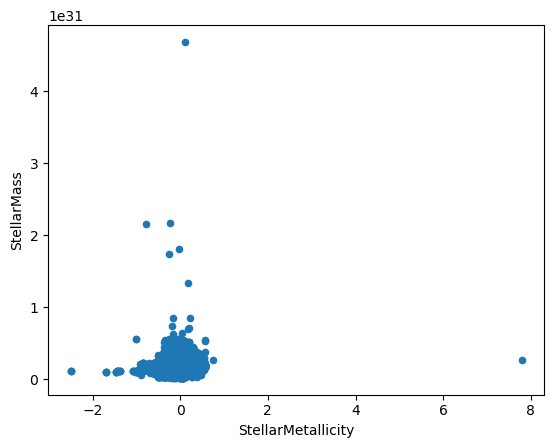

In [24]:
Scatter2 = df.plot.scatter(x='StellarMetallicity', y='StellarMass')

plt.show()

Q1:  -0.18
Q3:  0.14
IQR:  0.32


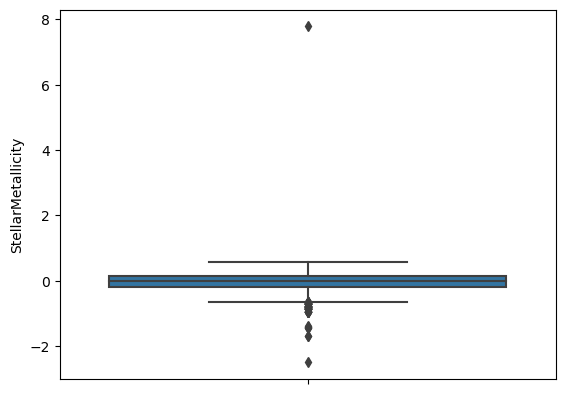

In [25]:
Q1 = df_unique['StellarMetallicity'].quantile(0.25)
print('Q1: ', Q1)
Q3 = df_unique['StellarMetallicity'].quantile(0.75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)

lower_bound = Q1 - 1.5 * IQR
#print this if you need more info
#print('lower_bound: ', lower_bound)
upper_bound = Q3 + 1.5 * IQR
#print this if you need more info
#print('upper_bound: ', upper_bound)

filter_lower_bound = (df_unique['StellarMetallicity'] < lower_bound)
filter_upper_bound = (df_unique['StellarMetallicity'] > upper_bound)
# to see outliers values:
#print(df_unique['StellarMetallicity'][(filter_lower_bound | filter_upper_bound)])

df_filtered = df_unique[~(filter_lower_bound | filter_upper_bound)]

# IQR 
Q1 = np.percentile(df_unique['StellarMetallicity'], 25, 
                method = 'midpoint') 
  
Q3 = np.percentile(df_unique['StellarMetallicity'], 75, 
                method = 'midpoint') 
IQR = Q3 - Q1 
#print this if you need more info 
#print("Old Shape: ", df.shape) 
  
# Upper bound 
upper = np.where(df_unique['StellarMetallicity'] >= (Q3+1.5*IQR)) 
  
# Lower bound 
lower = np.where(df_unique['StellarMetallicity']<= (Q1-1.5*IQR)) 

#print this if you need more info
#print(upper, lower,lower[0],upper[0],IQR)

sns.boxplot(data = df_unique, y = 'StellarMetallicity');
plt.show()

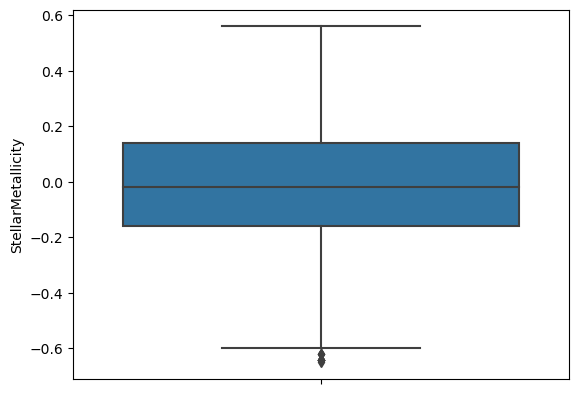

In [26]:
# Removing the Outliers from stellar metallicity
df_unique.drop(df_unique.index[upper[0]], inplace=True)
df_unique.drop(df_unique.index[lower[0]], inplace=True)

df_unique = df_filtered
#print this if you need more info 
#print("New Shape: ", df_unique.shape) 
  
sns.boxplot(data = df_unique, y = 'StellarMetallicity');
plt.show()

Q1:  583.0
Q3:  1097.0
IQR:  514.0
Old Shape:  (35896, 31)


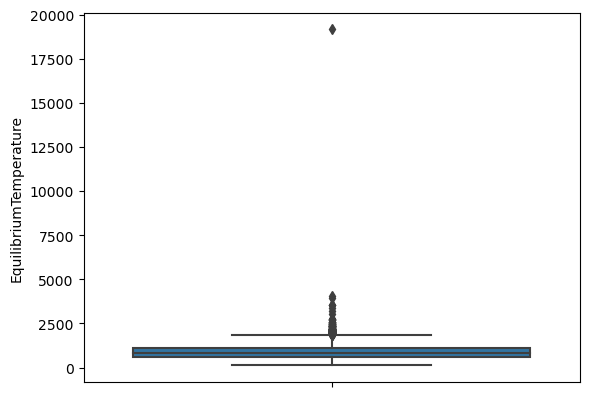

In [27]:
Q1 = df_unique['EquilibriumTemperature'].quantile(0.25)
print('Q1: ', Q1)
Q3 = df_unique['EquilibriumTemperature'].quantile(0.75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)

lower_bound = Q1 - 1.5 * IQR
#print this if you need more info
#print('lower_bound: ', lower_bound)
upper_bound = Q3 + 1.5 * IQR
#print this if you need more info
#print('upper_bound: ', upper_bound)

filter_lower_bound = (df_unique['EquilibriumTemperature'] < lower_bound)
filter_upper_bound = (df_unique['EquilibriumTemperature'] > upper_bound)
# to see outliers values:
#print(df_unique['EquilibriumTemperature'][(filter_lower_bound | filter_upper_bound)])

df_filtered = df_unique[~(filter_lower_bound | filter_upper_bound)]

# IQR 
Q1 = np.percentile(df_unique['EquilibriumTemperature'], 25, 
                method = 'midpoint') 
  
Q3 = np.percentile(df_unique['EquilibriumTemperature'], 75, 
                method = 'midpoint') 
IQR = Q3 - Q1 

#print this if you need more info
print("Old Shape: ", df.shape) 
  
# Upper bound 
upper = np.where(df_unique['EquilibriumTemperature'] >= (Q3+1.5*IQR)) 
  
# Lower bound 
lower = np.where(df_unique['EquilibriumTemperature']<= (Q1-1.5*IQR)) 
#print this if you need more info
#print(upper, lower,lower[0],upper[0],IQR)

sns.boxplot(data = df_unique, y = 'EquilibriumTemperature');
plt.show()

Due to the domain logic, the equilibrium temperature "outliers" should not be removed since the very high temperature is relative when it comes to other properties. For instance, if the planet has high mass,volume or is closer to its host star (low semi-major axis) it should have a temperature that is fitting. So even though some values seem like outliers, it is relative and cannot be dropped.

All other columns follow the same procedure, so dropping the "outliers" would actually only lead to loss of data.

Original DataFrame Shape: (35896, 31)
DataFrame Shape after Removing Outliers: (35896, 31)


<Axes: ylabel='StellarMetallicity'>

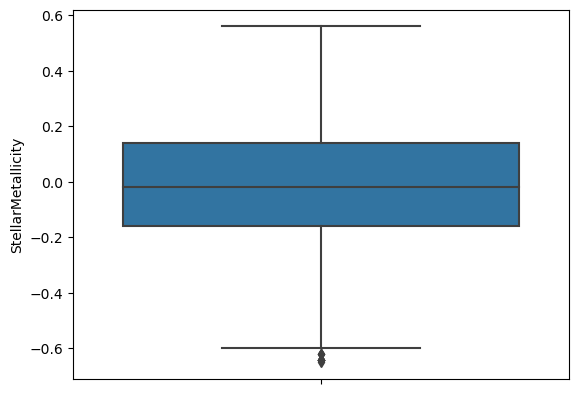

In [29]:
#Another way to detect and drop outliers
z = np.abs(stats.zscore(df['StellarMetallicity']))
threshold_z = 3

outlier_mask = z > threshold_z
no_outliers = df[~outlier_mask]
print("Original DataFrame Shape:", df.shape)
df = no_outliers
print("DataFrame Shape after Removing Outliers:", df.shape)
sns.boxplot(data = df_unique, y = 'StellarMetallicity')


# Exploratory Questions

## Question 1 

In [30]:
# Group the data by discovery method and calculate the percentage of controversial planets
#Since the discovery facilility categorical values are too plenty, it's visualization was unorganized thus we opted for method
df_facility = df_unique.groupby("DiscoveryFacility")["ControversialFlag"].mean().reset_index()

# Sort the data by the percentage of controversial planets in ascending order
df_facility = df_facility.sort_values("ControversialFlag", ascending=True)

# Print the results
print(df_facility)

                               DiscoveryFacility  ControversialFlag
0                   Acton Sky Portal Observatory           0.000000
31                        W. M. Keck Observatory           0.000000
30             United Kingdom Infrared Telescope           0.000000
28                                          TrES           0.000000
27                               SuperWASP-South           0.000000
26                               SuperWASP-North           0.000000
25                                     SuperWASP           0.000000
24                              Subaru Telescope           0.000000
23                       Spitzer Space Telescope           0.000000
22            Roque de los Muchachos Observatory           0.000000
21                                         Qatar           0.000000
20                           Paranal Observatory           0.000000
19                                          OGLE           0.000000
18         Next-Generation Transit Survey (NGTS)

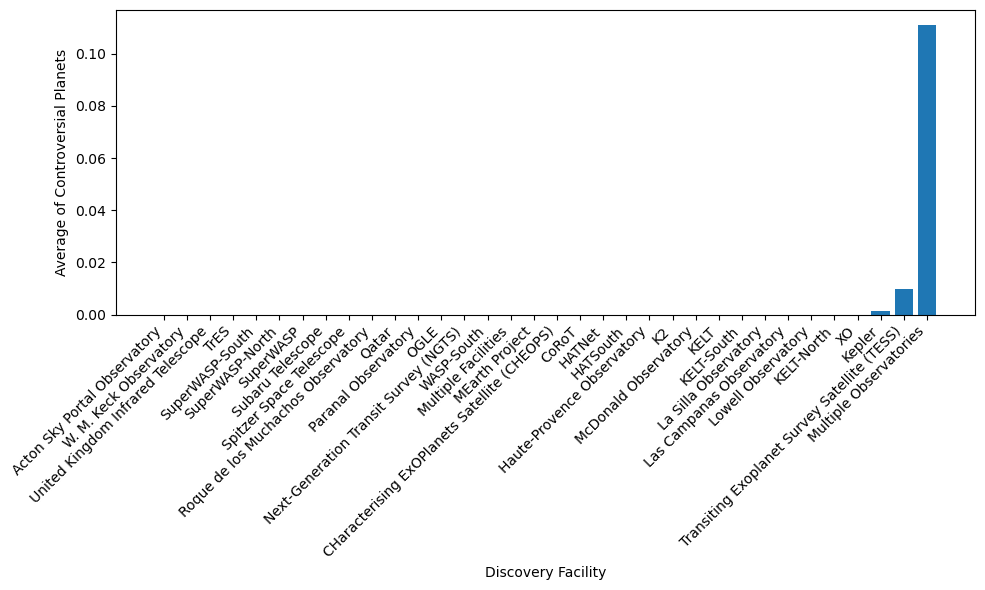

In [31]:

plt.figure(figsize=(10, 6))
plt.bar(df_facility["DiscoveryFacility"], df_facility["ControversialFlag"])
plt.xlabel("Discovery Facility")
plt.ylabel("Average of Controversial Planets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Question 1 Answer and Insights**

**Insights:**

According to these insights and visualizations, Multiple Observatories seems to be the most controversial discovery facility as it has the largest average of controversial planets, being moderately over 0.10. It was followed by Transiting Exoplanet Survey Satellite (TESS), which had approximately 0.01 average of controversial planets. Moreover, Kepler had a percentage of almost 0. However, that was still higher than all the other discovery facilities, which had no controversial planets.

Facilities with no average controversial planets indicate that said facility has a 100% accuracy in discovering legitimate planets.

Multiple Observatories is a term that describes a collection of facilities in different geographical locations working together. Evidently, when the discovery is not from one independent facility, the chance of controversy is a lot higher.

**Answer:**

It has been shown that the discovery facility does have an effect on the level of planet legitimacy. However, the effect has less to do with the facility itself and more to do with the number of facilities a certain discovery comes from.

## Question 2 

In [32]:
# Group the data by discovery method and calculate the average values of physical properties
df_method = df_unique.groupby("DiscoveryMethod")[["PlanetMass", "PlanetRadiusKm", "OrbitalPeriod", "OrbitSemi-MajorAxis", "Eccentricity"]].mean().reset_index()

# Print the results
print(df_method)


                 DiscoveryMethod    PlanetMass  PlanetRadiusKm  OrbitalPeriod  \
0  Orbital Brightness Modulation  1.542357e+30    87303.936667       1.544929   
1                Radial Velocity  1.308629e+27    34409.771000      43.795693   
2                        Transit  1.311993e+87    40844.100671      26.892311   
3      Transit Timing Variations  5.844119e+87    19607.999000      12.764127   

   OrbitSemi-MajorAxis  Eccentricity  
0         3.701275e+17      0.000000  
1         1.205547e+18      0.138530  
2         1.627709e+17      0.017805  
3         1.537416e+17      0.002174  


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


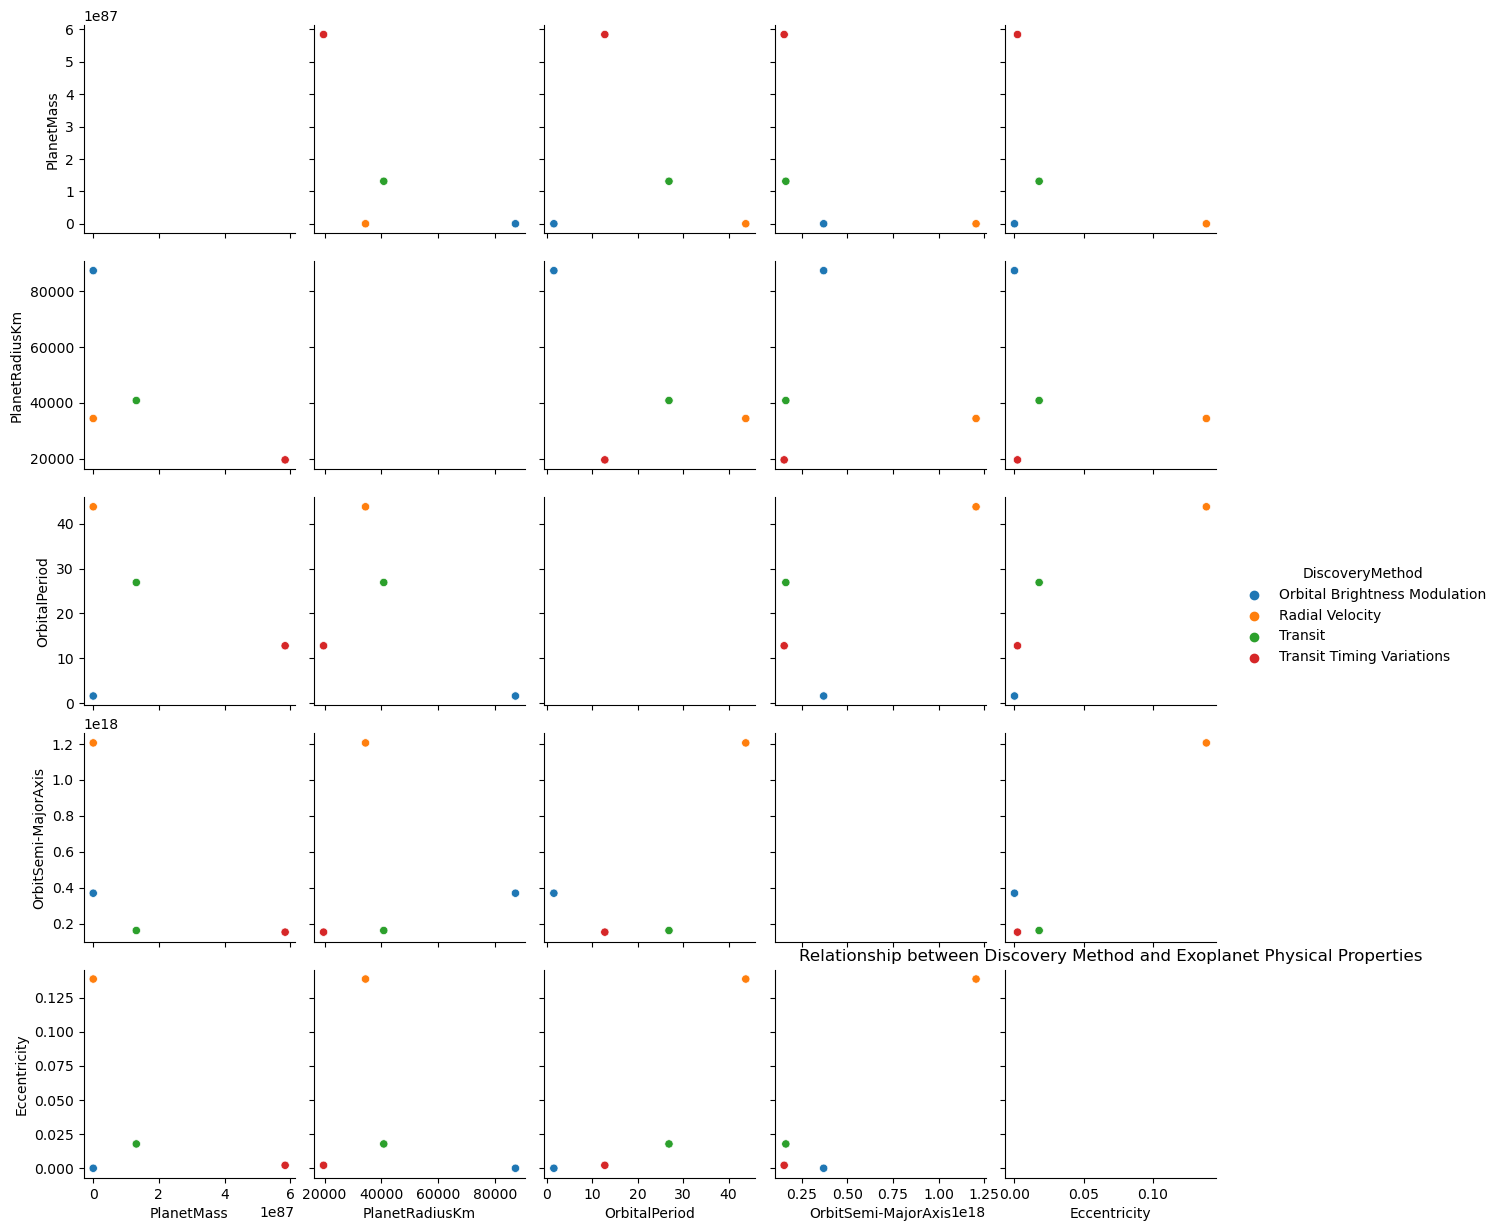

In [33]:
# Create the scatter plot matrix
sns.pairplot(df_method, hue='DiscoveryMethod')

# Add labels and title
plt.title('Relationship between Discovery Method and Exoplanet Physical Properties')
plt.xlabel('Physical Property')
plt.ylabel('Physical Property')

# Display the plot
plt.show()

**Insights:**

For the Orbital Brightness Modulation detection methods, most of the planets discovered tend to have low mass (approximately 0le87), large planet radius (over 80000), short orbital period (approximately 0 days), relatively low OrbitSemi-MajorAxis (around 0.4), and low eccentricity (around 0).

For the Radial Velocity, planets discovered tend to have low planet mass (approximately 0), relatively short planet radius (approximately 40000), long orbital period (above 40), long orbital semi-major axis (about 1.2), and high eccentricity (above 0.125).

For the Transit detection method, most of the planets discovered tend to have relatively low planet mass (between 1 and 2), relatively small planet radius (approximately 40000), average orbital period (higher than orbital period of planets discovered by Orbital Brightness Modulation and Transit timing variations, but lower than those discovered by Radial Velocity), low orbitSemi-major axis (around 0.2), relatively low eccentricity (around 0.025).

For the Transit Timing Variations detection method, planets discovered tend to have very high planet mass (above 6le87), very low planet radius, indicating that it is more effective with detecting smaller planets(around 20000), relatively short orbital period (around 10) indicating that it could detect planets orbiting relatively fast, and very low orbitSemi-major axis (below 0.2) indicating that it detects planets that are close to their host stars and eccentricity (around 0)  indicating that the deteceted planet's orbit is almost a perfect circle. 

large radius: detects planets with larger sizes
small radius: detects planets with smaller sizes
high orbital period: detects planets orbiting slowly around their host star/s
low orbital period: detects planets orbiting fast around their host star/s
large semi-major axis: detects planets that are far away from their host star/s
small semi-major axis: detects planets that are close to their host star/s
high eccentricity: detects planets that deviate greatly in its orbit
low eccentricity: detects planets that orbit in almost a perfect circle




**Answer:**

According to the Pairplot, the physical properties of the planets correlate to how they are discovered. Different discovery methods are better suited to be used with planets of certain properties.


## Question 3 

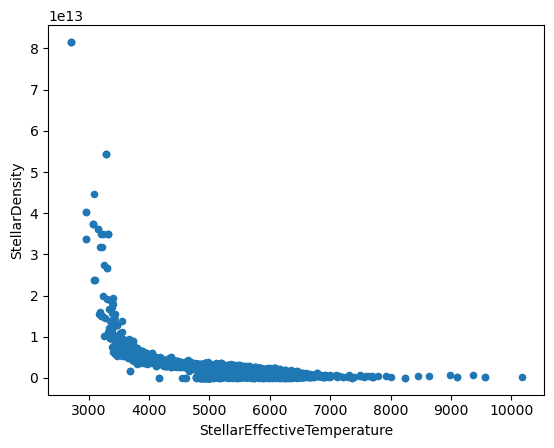

In [34]:
Q3Scatter = df_unique.plot.scatter(x='StellarEffectiveTemperature', y='StellarDensity')

# show the graph
plt.show()

Text(95.72222222222221, 0.5, 'Stellar Density')

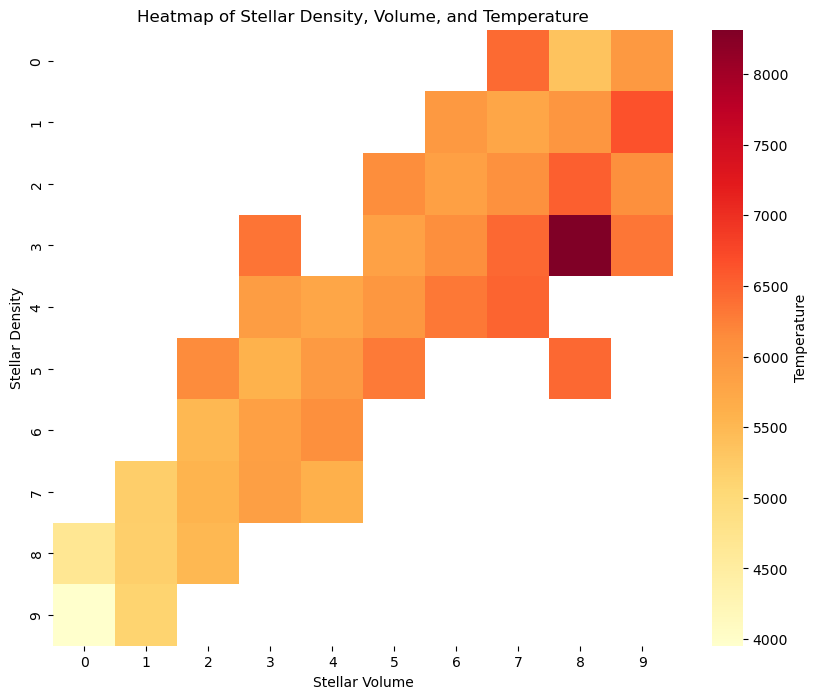

In [35]:
dff_agg = df_unique.groupby(['StellarVolume', 'StellarDensity'])['StellarEffectiveTemperature'].mean().reset_index()

dff_agg['StellarVolumeBin'] = pd.qcut(dff_agg['StellarVolume'], q=10, labels=False)
dff_agg['StellarDensityBin'] = pd.qcut(dff_agg['StellarDensity'], q=10, labels=False, duplicates='drop')
dff_agg = dff_agg.sort_values(['StellarVolumeBin', 'StellarDensityBin'])

pivot_table = dff_agg.pivot_table(index='StellarDensityBin', columns='StellarVolumeBin', values='StellarEffectiveTemperature')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
hm = sns.heatmap(pivot_table, annot=False, cmap='YlOrRd', )

colorbar = hm.collections[0].colorbar
colorbar.set_label("Temperature")

# Add title and labels
plt.title('Heatmap of Stellar Density, Volume, and Temperature')
plt.xlabel('Stellar Volume')
plt.ylabel('Stellar Density')




**Question 3 Answer and Insights**

**Insights:**
(Scatterplot)
From the data visualization shown, it appears that as Stellar Effective temperature increases, the Stellar Density decreases steeply at first, until the temperature reaches 5000. Then the density reaches a plateau at 0. Therefore, we can say that there is an inversely proportional relationship between Stellar Density and Stellar Effective Temperature, since as one increases the other decreases.

(Heatmap)
As shown by the heatmap, as stellar density decreases and stellar volume increases, the overall temperature of the planet increases. The color bar signify the lowest temperature (yellow) and the highest temperature (dark red), and as we follow the heat map from left (low stellar volume) to right (high stellar volume), and bottom (high stellar density) to top (low stellar density), the hue changes from light yellow to orange/ dark red.

Both the scatterplot and heatmap show with lower densities the temperature is higher, and the heatmap further shows that increasing the volume also increases the temperature. 

**Answer:**

According to the heatmap, planets with higher volumes and lower denisties tend to have higher temperatures.Eventhough this is the general consensus, the correlation is not linear since the highest temperature is not determined by a highest volume and lowest density.



## Question 4 

In [36]:
def convertMagnitude(row):
    G = row['StellarBrightnessGaia']
    d = row['DistancetoPlanetarySystem']
    M = G - 5 * math.log10(d) + 5
    
    return M

df_unique['StellarAbsoluteMagnitude'] = df_unique.apply(convertMagnitude, axis=1)


In [37]:
def calcLuminosity(row):
    M = row['StellarAbsoluteMagnitude']
    d = row['DistancetoPlanetarySystem']
    L = 4 * pi * (d*d) * 10 * (-0.4*M)
    
    return L

df_unique['StellarLuminosity'] = df_unique.apply(calcLuminosity, axis=1)



In [38]:
def lowerBound(row):
    LB = ((row['StellarLuminosity'] / (3.846 * (10**26)))**0.5) * 0.95
    
    return LB

def upperBound(row):
    UB = ((row['StellarLuminosity'] / (3.846 * (10**26)))**0.5) * 1.37
    
    return UB



In [39]:
df_unique['HabitableZoneLB'] = df_unique.apply(lowerBound, axis=1)
df_unique['HabitableZoneUB'] = df_unique.apply(upperBound, axis=1)


In [40]:
def habitibilityScore(row):
    score = 0
    LB = float(row['HabitableZoneLB'].real)
    UB = float(row['HabitableZoneUB'].real)
    if 0.0034 <= row['Eccentricity'] <= 0.058:
        score += 1
    if 0.5 <= row['OrbitSemi-MajorAxis'] <= 1.52:
        score += 1
    if 255 <= row['EquilibriumTemperature'] <= 288:
        score += 1
    if LB <= row['DistancetoPlanetarySystem'] <= UB:
        score += 1
    if 0.2 <= row['PlanetGravity'] <= 4.6:
        score += 1
        
    return score

df_unique['Habitability'] = df_unique.apply(habitibilityScore, axis=1)

grp = df_unique.groupby('Habitability')


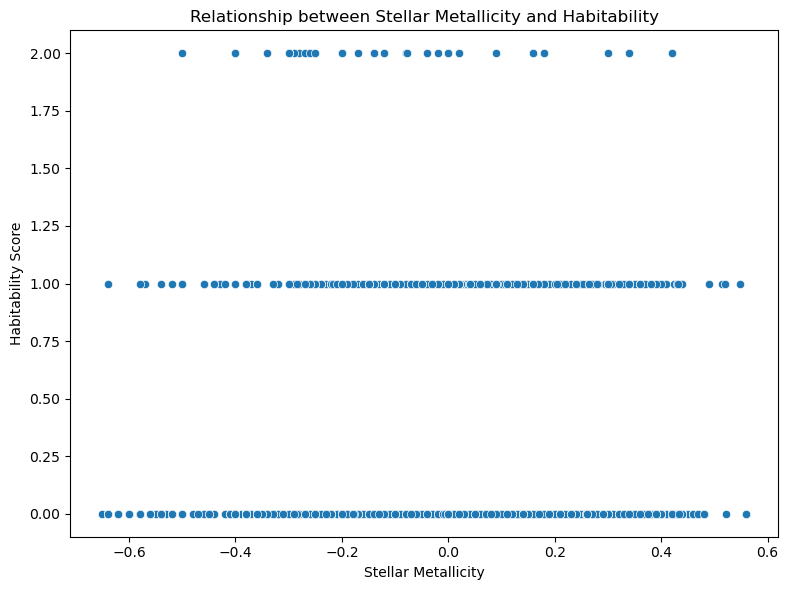

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_unique, x='StellarMetallicity', y='Habitability')
plt.xlabel('Stellar Metallicity')
plt.ylabel('Habitability Score')
plt.title('Relationship between Stellar Metallicity and Habitability')
plt.tight_layout()
plt.show()

**Question 4 Answer and Insights**

**Insights:**

There is almost no difference between the stellar metallicity of exoplanets with different habitability scores, with all planets with varying habitability scores having very similar metallicity values. From the data shown, there is not enough of a difference in metallicity to suggest that there is a correlation between exoplanet habitabilty and stellar metallicity.

**Answer**

The star metallicity does not dicate whether a planet is more habitable, the values are distributed randomly with different habitabilies and similar metalicity values. That being said, metallicity alone does not greatly impact the habitability of a planet, if at all. 


## Question 5

<Axes: xlabel='NumOfStars', ylabel='Eccentricity'>

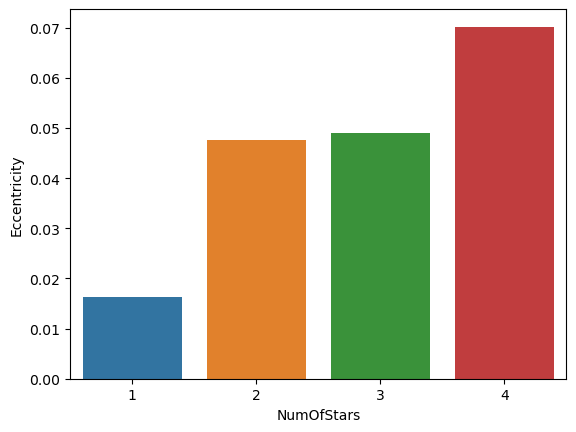

In [42]:
df5 = df_unique.groupby('NumOfStars')['Eccentricity'].mean().to_frame().reset_index()
sns.barplot(x="NumOfStars",  y = "Eccentricity", data= df5)

**Question 5 Answer and Insights**

**Insights:**

From the data visualized by the bar chart, a linear relationship between number of stars and eccentricity can be observed. It appears that planets with only 1 star in their planetary system have the lowest eccentricity (below 0.02), while planets with 4 stars in their planetary systems have the highest eccentricity (approximately 0.7), which is significantly higher than other numbers of stars. As the number of stars increase, the eccentricity also increases which cause planets to deviate more from a perfect orbit.

**Answer:**

It can be affirmed that the number of stars does in fact affect planet eccentricity, with eccentricity being significantly lower in the case where there is only 1 star or significantly higher when there are 4 stars, and consistently increasing. 

## Question 6 

<Axes: xlabel='Declination', ylabel='RightAscension'>

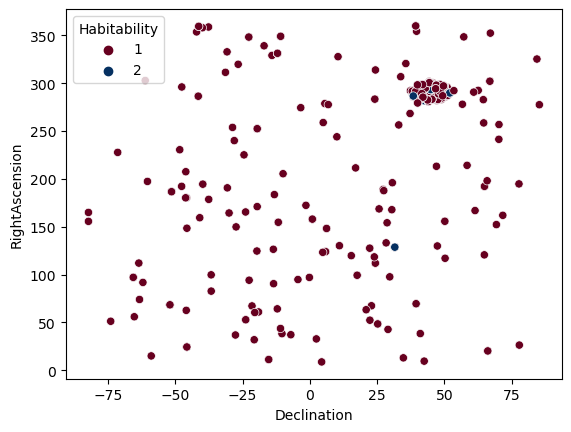

In [43]:
Habitabledf = df_unique[df_unique['Habitability']>0]
sns.scatterplot(x="Declination",y="RightAscension", data = Habitabledf, hue="Habitability", palette = "RdBu" )

<Axes: xlabel='Declination', ylabel='RightAscension'>

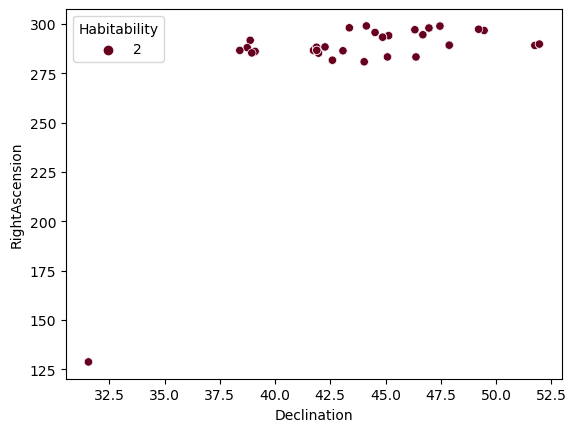

In [44]:
Habitabledf = df_unique[df_unique['Habitability']> 1]
sns.scatterplot(x="Declination",y="RightAscension", data = Habitabledf, hue="Habitability", palette = "RdBu" )

**Question 6 Answer and Insights**

**Insights:**

These scatter diagrams show the clusters of habitable planets within certain areas of the universe. Most prominently, planets with a habitability score of 1 are distributed fairly accross the graph, however, there is a cluster of habitable planets found around declination 50 and right ascention 300 indicating that this region hosts many potentially habitable planets.

Planets with habitability score of 2 tend to exist between right ascention 275 and 300 and declination ranging between 37.5 and 52.5, and exist within the same cluster of planets with habitability 1.

**Answer:**

Evidently, habitable planets tend to exist within close proximity to other habitable planets. Most habitable planets exist between right ascention 275-300 and declination 37.5-52.5.